<a href="https://colab.research.google.com/github/CHARLIE1210-A/Ashutosh_Singh-UIDAI_Data_analysis/blob/main/Demographic_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Data Loading and Initial Exploration

This section handles mounting Google Drive, loading the raw demographic data from CSV files, and performing an initial inspection to understand its structure, data types, and identify any missing values.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd

# Define the corrected path to the demographic data folder
data_folder_path = '/content/drive/MyDrive/Datasets/uidai/api_data_aadhar_demographic'

# Check if the directory exists and is a directory
if not os.path.exists(data_folder_path):
    print(f"Error: The specified data folder does not exist: {data_folder_path}")
    print("Please verify the path and ensure Google Drive is mounted correctly. You may need to create this folder or correct the path if there's a typo.")
    # Initialize empty lists to prevent further errors
    all_files = []
    csv_files = []
elif not os.path.isdir(data_folder_path):
    print(f"Error: The specified path is not a directory: {data_folder_path}")
    # Initialize empty lists to prevent further errors
    all_files = []
    csv_files = []
else:
    # List all files in the specified directory
    all_files = os.listdir(data_folder_path)

    # Filter for CSV files
    csv_files = [f for f in all_files if f.endswith('.csv')]

# Initialize an empty list to store individual DataFrames
df_list = []

# Loop through each CSV file, read it, and append to the list
for csv_file in csv_files:
    file_path = os.path.join(data_folder_path, csv_file)
    try:
        df = pd.read_csv(file_path)
        df_list.append(df)
    except Exception as e:
        print(f"Error reading {file_path}: {e}")

# Concatenate all DataFrames into a single DataFrame
if df_list:
    df_demographics = pd.concat(df_list, ignore_index=True)
    print("All CSV files combined into a single DataFrame (df_demographics).")
    print("Shape of combined DataFrame:", df_demographics.shape)
    print("First 5 rows of combined DataFrame:")
    print(df_demographics.head())
else:
    print("No CSV files found or unable to read any CSV files, or the directory was not found.")

All CSV files combined into a single DataFrame (df_demographics).
Shape of combined DataFrame: (2071700, 6)
First 5 rows of combined DataFrame:
         date           state    district  pincode  demo_age_5_17  \
0  01-03-2025   Uttar Pradesh   Gorakhpur   273213             49   
1  01-03-2025  Andhra Pradesh    Chittoor   517132             22   
2  01-03-2025         Gujarat      Rajkot   360006             65   
3  01-03-2025  Andhra Pradesh  Srikakulam   532484             24   
4  01-03-2025       Rajasthan     Udaipur   313801             45   

   demo_age_17_  
0           529  
1           375  
2           765  
3           314  
4           785  


### Initial Data Inspection

Reviewing the first few rows, data types, and checking for missing values to ensure data quality before proceeding with analysis.

In [3]:
print("\n--- First 5 rows of df_demographics ---")
print(df_demographics.head())

print("\n--- DataFrame Info (data types and non-null counts) ---")
df_demographics.info()

print("\n--- Missing values count per column ---")
print(df_demographics.isnull().sum())

print("\n--- Descriptive statistics for numerical columns ---")
print(df_demographics.describe())


--- First 5 rows of df_demographics ---
         date           state    district  pincode  demo_age_5_17  \
0  01-03-2025   Uttar Pradesh   Gorakhpur   273213             49   
1  01-03-2025  Andhra Pradesh    Chittoor   517132             22   
2  01-03-2025         Gujarat      Rajkot   360006             65   
3  01-03-2025  Andhra Pradesh  Srikakulam   532484             24   
4  01-03-2025       Rajasthan     Udaipur   313801             45   

   demo_age_17_  
0           529  
1           375  
2           765  
3           314  
4           785  

--- DataFrame Info (data types and non-null counts) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071700 entries, 0 to 2071699
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   state          object
 2   district       object
 3   pincode        int64 
 4   demo_age_5_17  int64 
 5   demo_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 94.8+ MB


## 2. Feature Engineering

Extracting useful features from the `df_demographics` DataFrame, including converting the 'date' column, extracting year and month, and calculating total demographic counts and ratios for further analysis.

In [4]:
import numpy as np

# 1. Convert the 'date' column to datetime objects
df_demographics['date'] = pd.to_datetime(df_demographics['date'], errors='coerce', format='%d-%m-%Y')

# 2. Create a new column named 'year' by extracting the year from the 'date' column.
df_demographics['year'] = df_demographics['date'].dt.year

# 3. Create a new column named 'month' by extracting the month from the 'date' column.
df_demographics['month'] = df_demographics['date'].dt.month

# 4. Create a new column named 'total_demographics' by summing the 'demo_age_5_17' and 'demo_age_17_' columns.
df_demographics['total_demographics'] = df_demographics['demo_age_5_17'] + df_demographics['demo_age_17_']

# 5. Create a new column named 'age_group_5_17_ratio' by dividing 'demo_age_5_17' by 'total_demographics'.
# Handle potential division by zero by filling NaN values with 0.
df_demographics['age_group_5_17_ratio'] = df_demographics['demo_age_5_17'] / df_demographics['total_demographics']
df_demographics['age_group_5_17_ratio'] = df_demographics['age_group_5_17_ratio'].fillna(0)

# 6. Create a new column named 'age_group_17_plus_ratio' by dividing 'demo_age_17_' by 'total_demographics'.
# Handle potential division by zero by filling NaN values with 0.
df_demographics['age_group_17_plus_ratio'] = df_demographics['demo_age_17_'] / df_demographics['total_demographics']
df_demographics['age_group_17_plus_ratio'] = df_demographics['age_group_17_plus_ratio'].fillna(0)

# 7. Display the first few rows of the DataFrame with the new features and check the data types.
print("\n--- First 5 rows of df_demographics with new features ---")
print(df_demographics.head())

print("\n--- DataFrame Info after feature extraction ---")
df_demographics.info()


--- First 5 rows of df_demographics with new features ---
        date           state    district  pincode  demo_age_5_17  \
0 2025-03-01   Uttar Pradesh   Gorakhpur   273213             49   
1 2025-03-01  Andhra Pradesh    Chittoor   517132             22   
2 2025-03-01         Gujarat      Rajkot   360006             65   
3 2025-03-01  Andhra Pradesh  Srikakulam   532484             24   
4 2025-03-01       Rajasthan     Udaipur   313801             45   

   demo_age_17_  year  month  total_demographics  age_group_5_17_ratio  \
0           529  2025      3                 578              0.084775   
1           375  2025      3                 397              0.055416   
2           765  2025      3                 830              0.078313   
3           314  2025      3                 338              0.071006   
4           785  2025      3                 830              0.054217   

   age_group_17_plus_ratio  
0                 0.915225  
1                 0.944584  


## 3. Initial Data Visualizations

Creating visualizations for key extracted features, including the distribution of total demographics, year, month, and age group ratios. This helps in understanding the overall data characteristics.

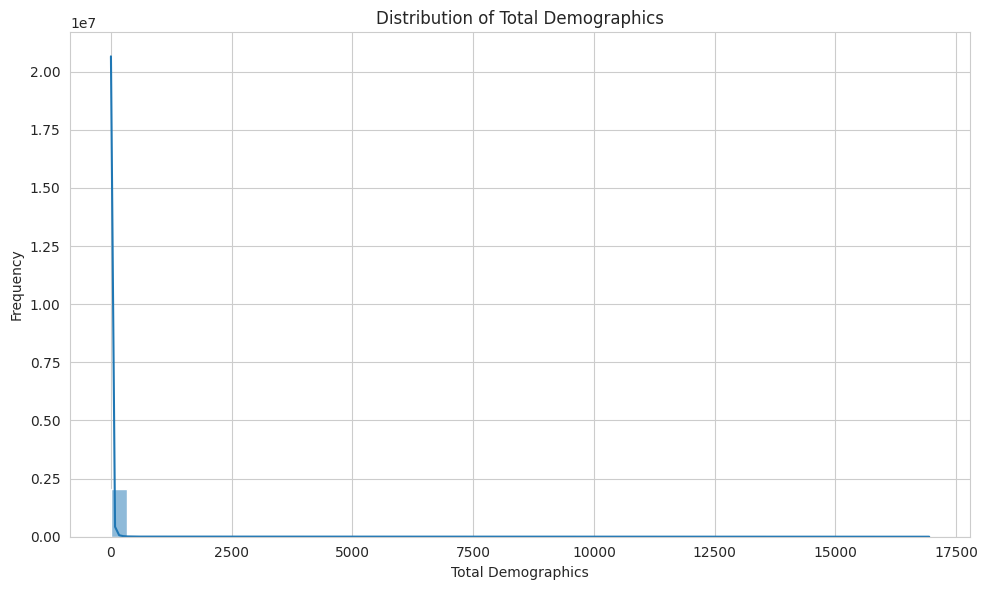

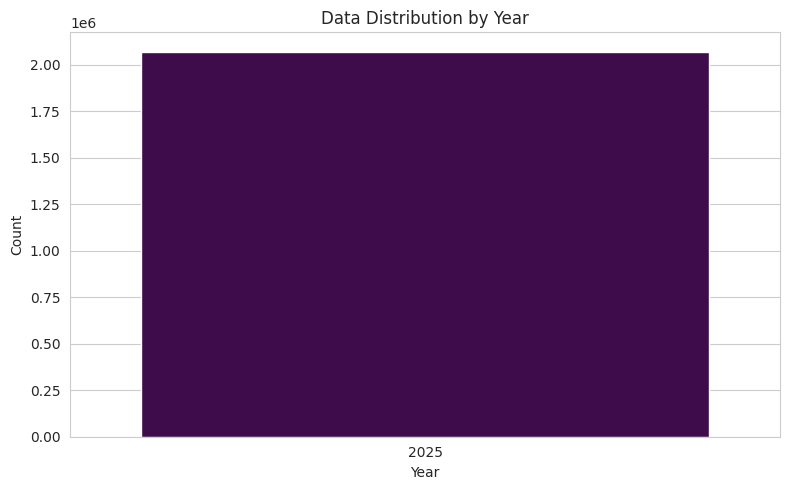

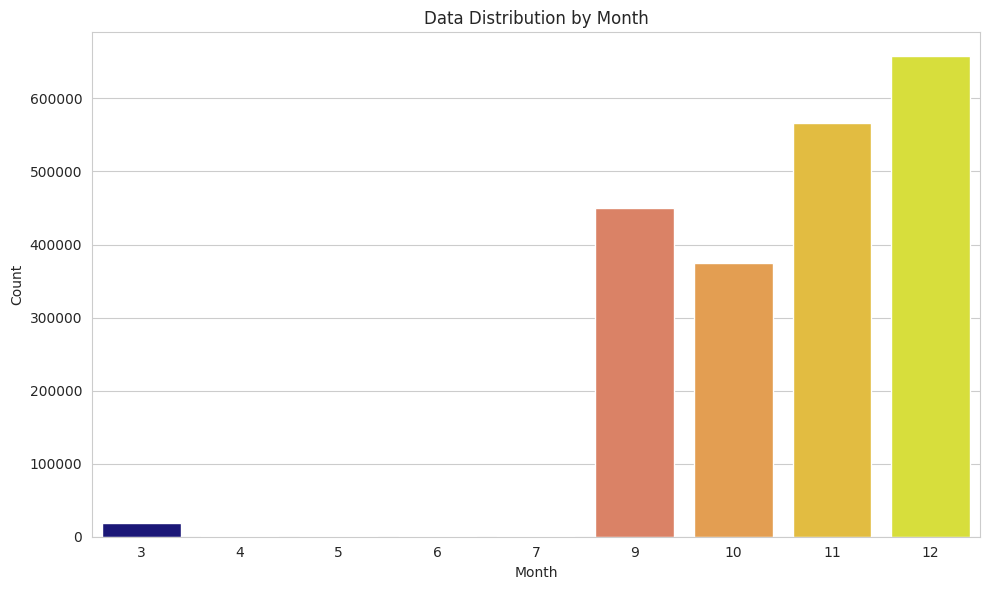

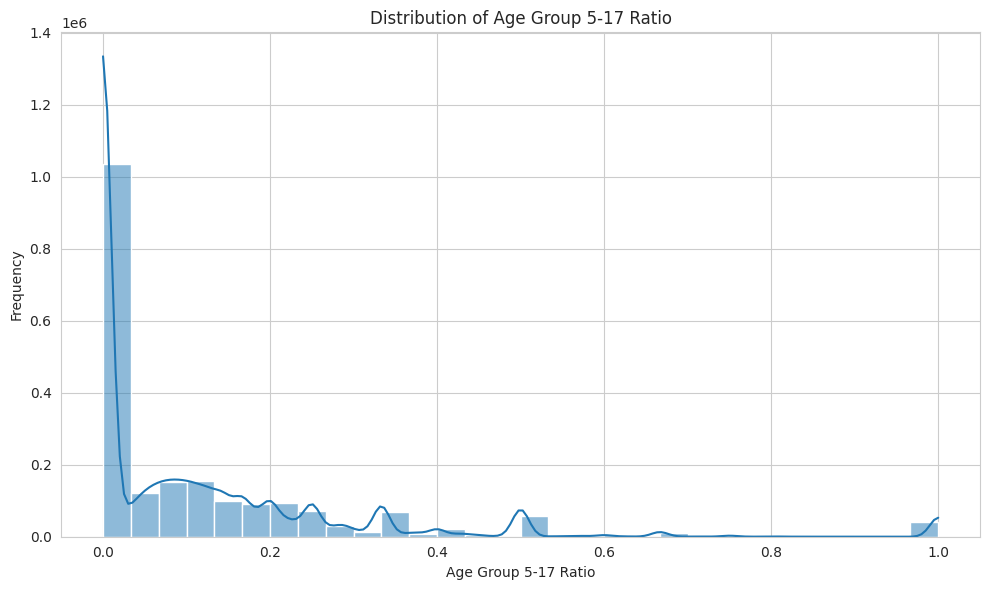

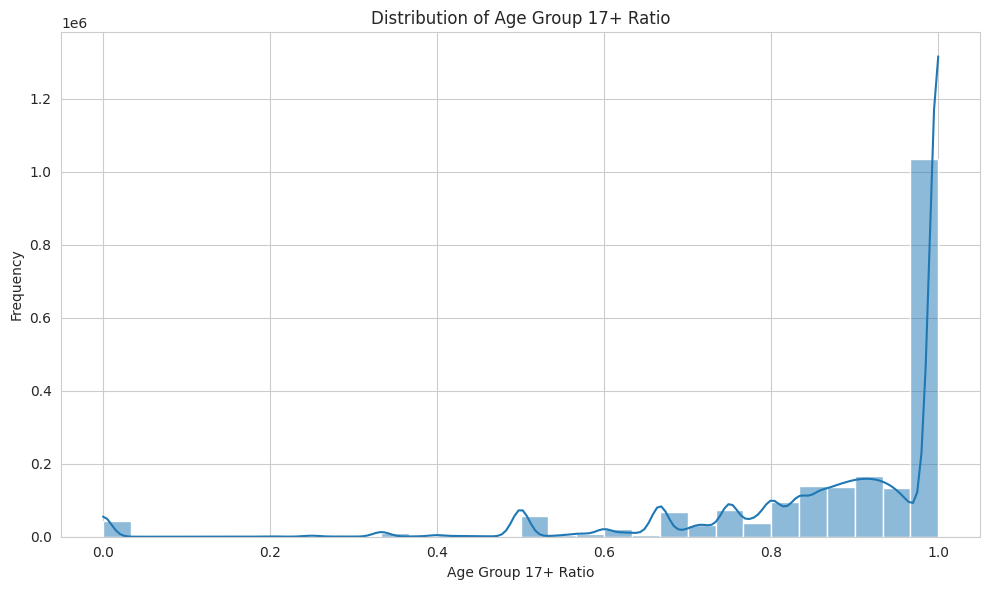

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# 1. Distribution of total_demographics
plt.figure(figsize=(10, 6))
sns.histplot(df_demographics['total_demographics'], bins=50, kde=True)
plt.title('Distribution of Total Demographics')
plt.xlabel('Total Demographics')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 2. Data Distribution by Year
plt.figure(figsize=(8, 5))
sns.countplot(x='year', data=df_demographics, hue='year', palette='viridis', legend=False)
plt.title('Data Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 3. Data Distribution by Month
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=df_demographics, hue='month', palette='plasma', legend=False)
plt.title('Data Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 4. Distribution of age_group_5_17_ratio
plt.figure(figsize=(10, 6))
sns.histplot(df_demographics['age_group_5_17_ratio'], bins=30, kde=True)
plt.title('Distribution of Age Group 5-17 Ratio')
plt.xlabel('Age Group 5-17 Ratio')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 5. Distribution of age_group_17_plus_ratio
plt.figure(figsize=(10, 6))
sns.histplot(df_demographics['age_group_17_plus_ratio'], bins=30, kde=True)
plt.title('Distribution of Age Group 17+ Ratio')
plt.xlabel('Age Group 17+ Ratio')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Initial EDA Summary

- **Data Integration Success**: The analysis successfully combined 2,071,700 rows and 6 columns of demographic data from multiple CSV files into a single DataFrame, `df_demographics`.
- **Data Quality**: The combined dataset showed no missing values across any of its columns.
- **Skewed Age Group Distributions**: `demo_age_5_17` (mean ~2.35, max 2,690) and `demo_age_17_` (mean ~21.45, max 16,166) exhibited highly skewed distributions, indicating a majority of entries have low counts with occasional significantly higher values.
- **Feature Engineering**: 'date' was converted to datetime, 'year' and 'month' extracted, and 'total_demographics', 'age_group_5_17_ratio', and 'age_group_17_plus_ratio' were calculated.
- **Visualization Insights**: Confirmed the highly skewed nature of `total_demographics` and age group ratios.

**Next Steps**: Further investigation of skewed distributions, and geospatial and temporal analysis.

## 4. Data Cleaning: Inconsistent State Names

This section focuses on inspecting and cleaning the 'state' column to resolve inconsistencies, typos, and non-state entries that could affect geographical analysis. The goal is to standardize state names for accurate regional insights.

### Inspect Unique State Names

Inspecting the unique values in the 'state' column to identify inconsistencies, typos, or non-state entries that might be skewing our geographical analysis. This step involves printing the unique states and their frequencies.

In [6]:
print("--- Unique State Names and Frequencies ---")
print(df_demographics['state'].value_counts())

--- Unique State Names and Frequencies ---
state
Andhra Pradesh          207687
Tamil Nadu              196857
West Bengal             168623
Uttar Pradesh           167889
Maharashtra             162242
                         ...  
Jaipur                       2
Madanapalle                  2
Puttenahalli                 1
Nagpur                       1
Raja Annamalai Puram         1
Name: count, Length: 65, dtype: int64


### Apply Initial State Name Cleaning

Correcting common typos and inconsistent entries in the 'state' column by mapping them to their standardized names. All state names are converted to title case for consistency.

In [7]:
df_demographics['state'] = df_demographics['state'].str.title()

# Refine the mapping for common inconsistencies, typos, and non-state entries
state_name_mapping = {
    '100000': 'Unknown',
    'Balanagar': 'Telangana', # Assuming BALANAGAR is a locality in Telangana, assign to state
    'Chhatisgarh': 'Chhattisgarh',
    'Darbhanga': 'Bihar', # Darbhanga is a district in Bihar
    'Jaipur': 'Rajasthan', # Jaipur is a district in Rajasthan
    'Madanapalle': 'Andhra Pradesh', # Madanapalle is a town in Andhra Pradesh
    'Nagpur': 'Maharashtra', # Nagpur is a city in Maharashtra
    'Puttenahalli': 'Karnataka', # Puttenahalli is a locality in Karnataka
    'Raja Annamalai Puram': 'Tamil Nadu', # Raja Annamalai Puram is a locality in Tamil Nadu
    'West Bengli': 'West Bengal',
    'Westbengal': 'West Bengal',
    'West Bengal': 'West Bengal', # Consolidate variations
    'West  Bengal': 'West Bengal',
    'West Bangal': 'West Bengal', # Further consolidate variations
    'Orissa': 'Odisha', # Correct common misspelling
    'Uttaranchal': 'Uttarakhand', # Old name for Uttarakhand
    'Andaman & Nicobar Islands': 'Andaman And Nicobar Islands', # Consolidate variations
    'Jammu & Kashmir': 'Jammu And Kashmir', # Consolidate variations
    'Pondicherry': 'Puducherry', # Correct old name
    'Dadra And Nagar Haveli': 'Dadra And Nagar Haveli And Daman And Diu', # Consolidate UTs
    'Daman And Diu': 'Dadra And Nagar Haveli And Daman And Diu', # Consolidate UTs
    'Dadra & Nagar Haveli': 'Dadra And Nagar Haveli And Daman And Diu', # Consolidate UTs
    'Daman & Diu': 'Dadra And Nagar Haveli And Daman And Diu' # Consolidate UTs
}

# Apply the mapping to the 'state' column
df_demographics['state'] = df_demographics['state'].replace(state_name_mapping)

# Re-check unique values and their frequencies after cleaning
print("Unique State Names and Frequencies After Further Cleaning ---")
print(df_demographics['state'].value_counts())

Unique State Names and Frequencies After Further Cleaning ---
state
Andhra Pradesh                              207742
Tamil Nadu                                  196858
West Bengal                                 169070
Uttar Pradesh                               167889
Maharashtra                                 162243
Karnataka                                   153958
Odisha                                      105935
Kerala                                      105515
Bihar                                        97623
Gujarat                                      96399
Rajasthan                                    89510
Telangana                                    89088
Madhya Pradesh                               76364
Assam                                        62834
Punjab                                       49611
Jharkhand                                    39653
Chhattisgarh                                 35730
Haryana                                      28554
Himachal Prade

### Remove Noisy State Entries

Filtering out state entries identified as 'Unknown' from the `df_demographics` DataFrame, as these represent erroneous or unidentifiable locations.

In [8]:
df_demographics = df_demographics[df_demographics['state'] != 'Unknown']

print("--- Unique State Names and Frequencies After Removing 'Unknown' Entries ---")
print(df_demographics['state'].value_counts())

--- Unique State Names and Frequencies After Removing 'Unknown' Entries ---
state
Andhra Pradesh                              207742
Tamil Nadu                                  196858
West Bengal                                 169070
Uttar Pradesh                               167889
Maharashtra                                 162243
Karnataka                                   153958
Odisha                                      105935
Kerala                                      105515
Bihar                                        97623
Gujarat                                      96399
Rajasthan                                    89510
Telangana                                    89088
Madhya Pradesh                               76364
Assam                                        62834
Punjab                                       49611
Jharkhand                                    39653
Chhattisgarh                                 35730
Haryana                                      28554


### Summary of Data Cleaning

*   **State Name Inconsistencies Corrected:** The 'state' column initially contained 65 unique entries, exhibiting numerous inconsistencies, including cities/localities (e.g., 'Jaipur', 'Nagpur', 'Balanagar'), spelling errors (e.g., 'Chhatisgarh', 'West Bengli', 'Orissa'), and outdated names (e.g., 'Uttaranchal', 'Pondicherry'). Through multiple cleaning steps, including title casing and a comprehensive mapping, these inconsistencies were resolved. For instance, 'Chhatisgarh' was corrected to 'Chhattisgarh', 'Uttaranchal' to 'Uttarakhand', 'Orissa' to 'Odisha', and 'Pondicherry' to 'Puducherry'. Localities like 'Jaipur' were mapped to 'Rajasthan'.
*   **Union Territories Consolidated:** Variations and fragments of Union Territory names were standardized, such as unifying different forms of 'Dadra And Nagar Haveli' and 'Daman And Diu' into 'Dadra And Nagar Haveli And Daman And Diu', and 'Andaman & Nicobar Islands' to 'Andaman And Nicobar Islands'.
*   **Erroneous 'Unknown' State Entries Removed:** Entries explicitly identified as 'Unknown' in the 'state' column, which likely represented unidentifiable locations, were successfully filtered out from the `df_demographics` DataFrame.


## 5. Outlier Analysis and Treatment

This section reviews the distributions of 'demo_age_5_17', 'demo_age_17_', and 'total_demographics' to identify and visualize significant outliers. It then quantifies them using the IQR method and applies a capping strategy to mitigate their impact on analysis.

### Visualizing Outliers with Box Plots

Creating box plots for 'demo_age_5_17', 'demo_age_17_', and 'total_demographics' to visually inspect their distributions and identify potential outliers.

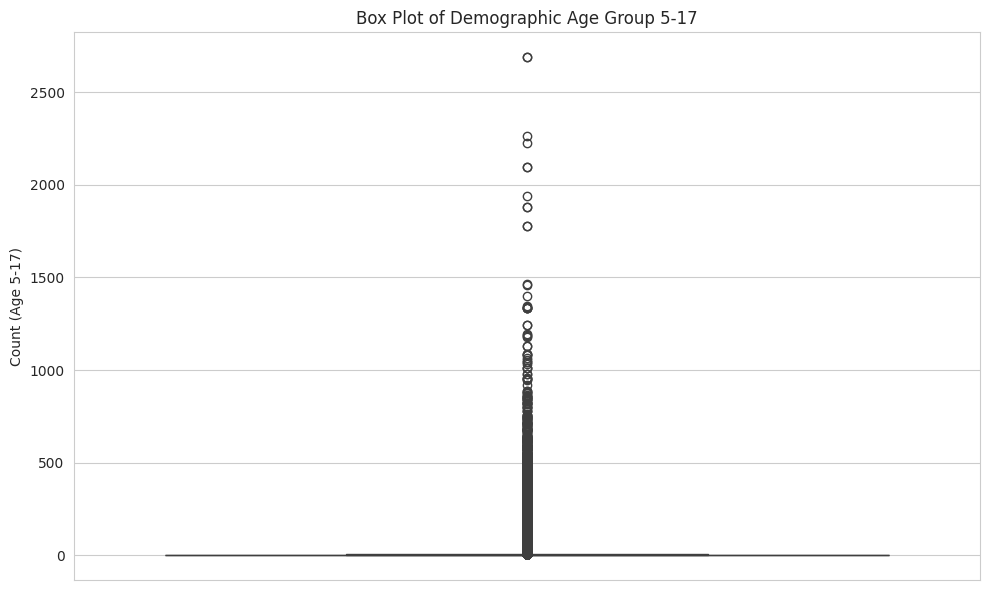

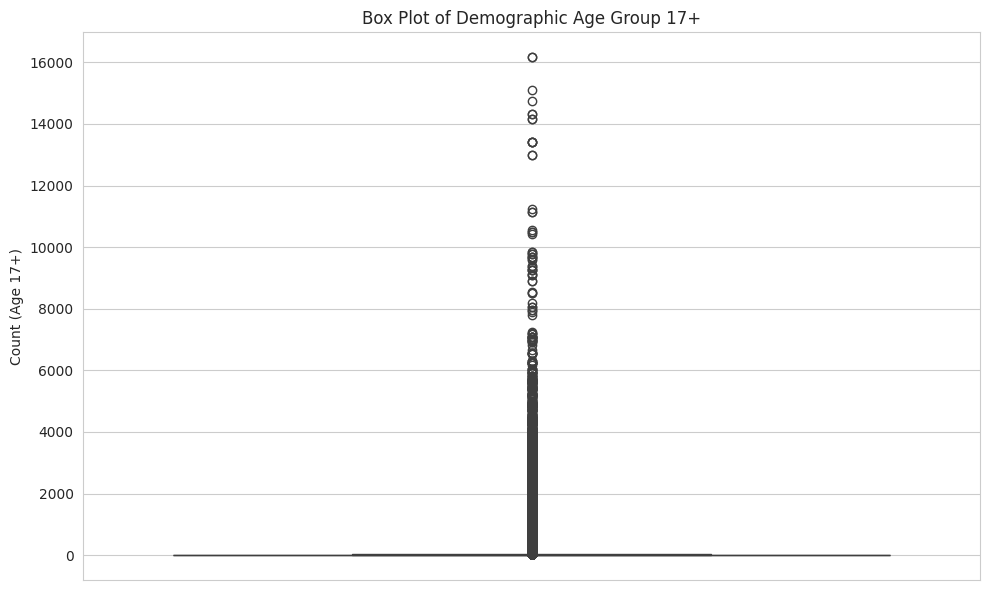

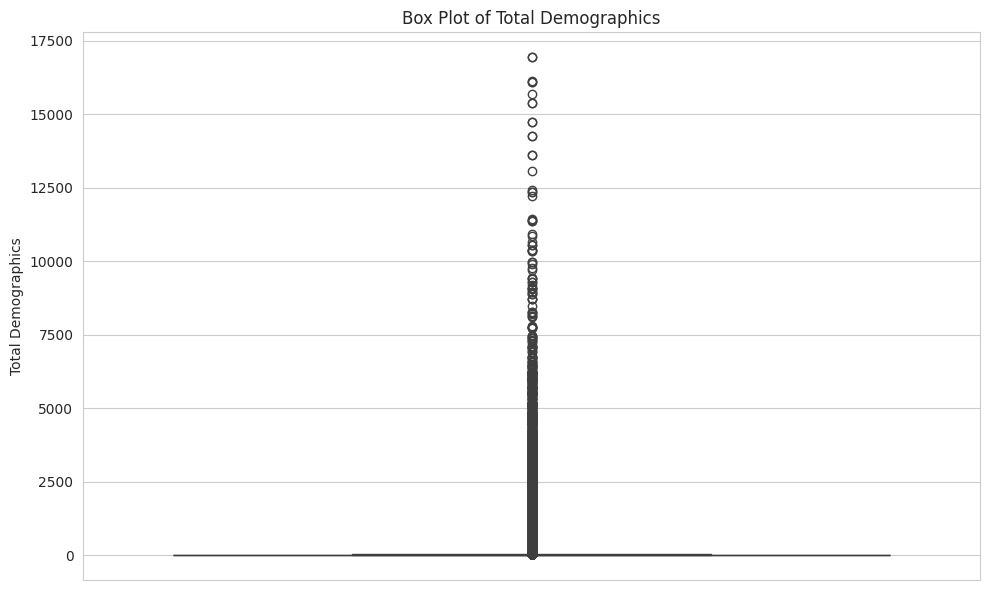

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Box plot for 'demo_age_5_17'
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_demographics['demo_age_5_17'])
plt.title('Box Plot of Demographic Age Group 5-17')
plt.ylabel('Count (Age 5-17)')
plt.tight_layout()
plt.show()

# Box plot for 'demo_age_17_'
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_demographics['demo_age_17_'])
plt.title('Box Plot of Demographic Age Group 17+')
plt.ylabel('Count (Age 17+)')
plt.tight_layout()
plt.show()

# Box plot for 'total_demographics'
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_demographics['total_demographics'])
plt.title('Box Plot of Total Demographics')
plt.ylabel('Total Demographics')
plt.tight_layout()
plt.show()

### Quantifying Outliers using IQR Method

Analyzing the identified outliers in 'demo_age_5_17', 'demo_age_17_', and 'total_demographics' using the Interquartile Range (IQR) method to quantify their presence and understand their magnitude.

In [10]:
import numpy as np

def detect_and_print_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_count = len(outliers)

    print(f"\n--- Outlier Analysis for '{column}' ---")
    print(f"Q1: {Q1:.2f}")
    print(f"Q3: {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"Lower Bound: {lower_bound:.2f}")
    print(f"Upper Bound: {upper_bound:.2f}")
    print(f"Number of Outliers: {outlier_count}")

# Analyze outliers for 'demo_age_5_17'
detect_and_print_outliers(df_demographics, 'demo_age_5_17')

# Analyze outliers for 'demo_age_17_'
detect_and_print_outliers(df_demographics, 'demo_age_17_')

# Analyze outliers for 'total_demographics'
detect_and_print_outliers(df_demographics, 'total_demographics')


--- Outlier Analysis for 'demo_age_5_17' ---
Q1: 0.00
Q3: 2.00
IQR: 2.00
Lower Bound: -3.00
Upper Bound: 5.00
Number of Outliers: 147428

--- Outlier Analysis for 'demo_age_17_' ---
Q1: 2.00
Q3: 15.00
IQR: 13.00
Lower Bound: -17.50
Upper Bound: 34.50
Number of Outliers: 217379

--- Outlier Analysis for 'total_demographics' ---
Q1: 3.00
Q3: 17.00
IQR: 14.00
Lower Bound: -18.00
Upper Bound: 38.00
Number of Outliers: 215075


### Chosen Outlier Treatment Strategy: Capping

**Strategy**: For the columns 'demo_age_5_17', 'demo_age_17_', and 'total_demographics', we will cap the values identified as upper outliers. Any value exceeding the calculated upper bound (Q3 + 1.5 * IQR) will be replaced with this upper bound value.

**Reasoning**:
1.  **High Outlier Count**: The outlier analysis showed a large number of outliers (e.g., ~7% for `demo_age_5_17`, ~10% for `demo_age_17_` and `total_demographics`). Removing such a large portion of the dataset would lead to significant information loss.
2.  **Nature of Data**: These columns represent counts. While some counts are exceptionally high, they might represent legitimate demographic activity rather than mere data entry errors. Completely removing these entries would eliminate real variations.
3.  **Mitigating Influence**: Capping reduces the disproportionate influence of extremely high values on statistical measures and models without discarding the data point entirely.
4.  **Preservation of Data**: By replacing extreme values with the upper bound, we preserve the overall structure and relationships within the dataset. This strategy minimizes data loss and maintains the interpretability of raw count values.

### Apply Outlier Treatment

Implementing the chosen outlier treatment strategy (capping) on the 'demo_age_5_17', 'demo_age_17_', and 'total_demographics' columns in the `df_demographics` DataFrame.

In [11]:
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    # Cap values greater than the upper bound
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    print(f"Outliers in '{column}' capped at upper bound: {upper_bound:.2f}")
    return df

# Apply outlier capping for 'demo_age_5_17'
df_demographics = cap_outliers_iqr(df_demographics, 'demo_age_5_17')

# Apply outlier capping for 'demo_age_17_'
df_demographics = cap_outliers_iqr(df_demographics, 'demo_age_17_')

# Apply outlier capping for 'total_demographics'
df_demographics = cap_outliers_iqr(df_demographics, 'total_demographics')

# Verify changes by re-running descriptive statistics
print("\n--- Descriptive statistics after outlier treatment ---")
print(df_demographics[['demo_age_5_17', 'demo_age_17_', 'total_demographics']].describe())

Outliers in 'demo_age_5_17' capped at upper bound: 5.00
Outliers in 'demo_age_17_' capped at upper bound: 34.50
Outliers in 'total_demographics' capped at upper bound: 38.00

--- Descriptive statistics after outlier treatment ---
       demo_age_5_17  demo_age_17_  total_demographics
count   2.071698e+06  2.071698e+06        2.071698e+06
mean    1.234655e+00  1.051495e+01        1.175842e+01
std     1.618143e+00  1.100524e+01        1.211664e+01
min     0.000000e+00  0.000000e+00        0.000000e+00
25%     0.000000e+00  2.000000e+00        3.000000e+00
50%     1.000000e+00  6.000000e+00        7.000000e+00
75%     2.000000e+00  1.500000e+01        1.700000e+01
max     5.000000e+00  3.450000e+01        3.800000e+01


### Verify Data After Outlier Treatment

Re-examining the descriptive statistics and box plots for the affected columns to ensure the capping treatment was effective and did not introduce new issues.

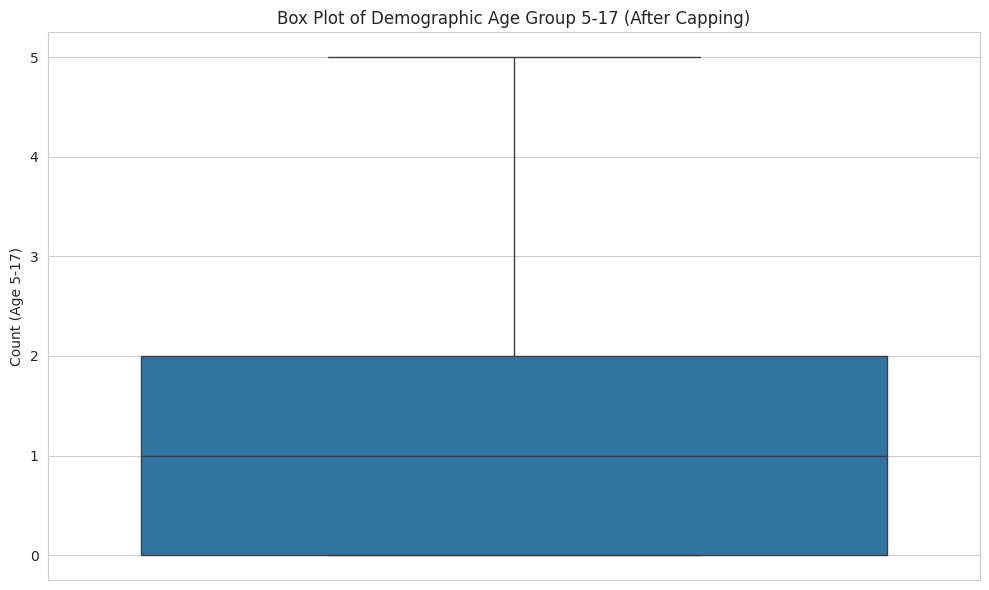

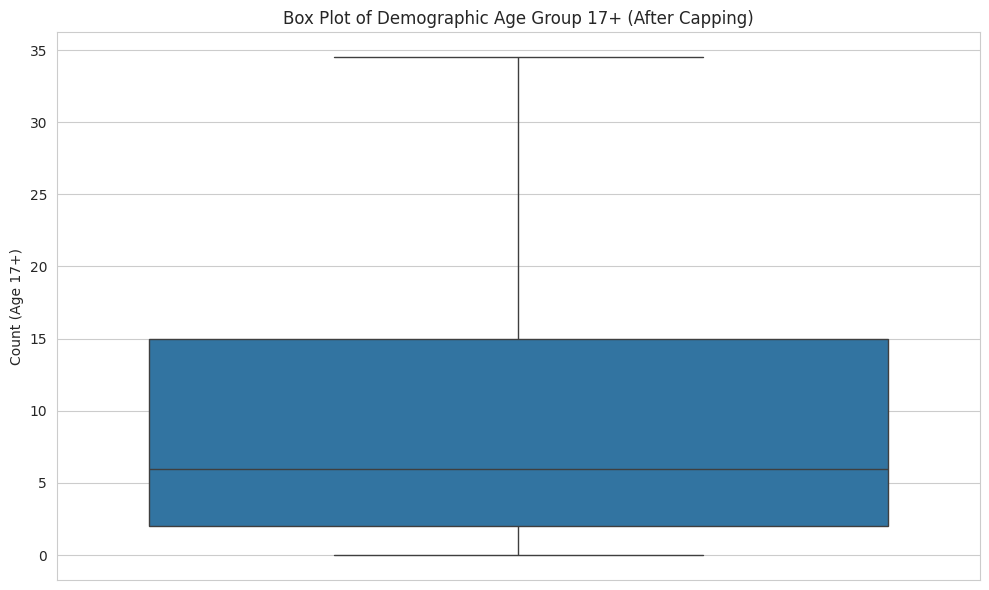

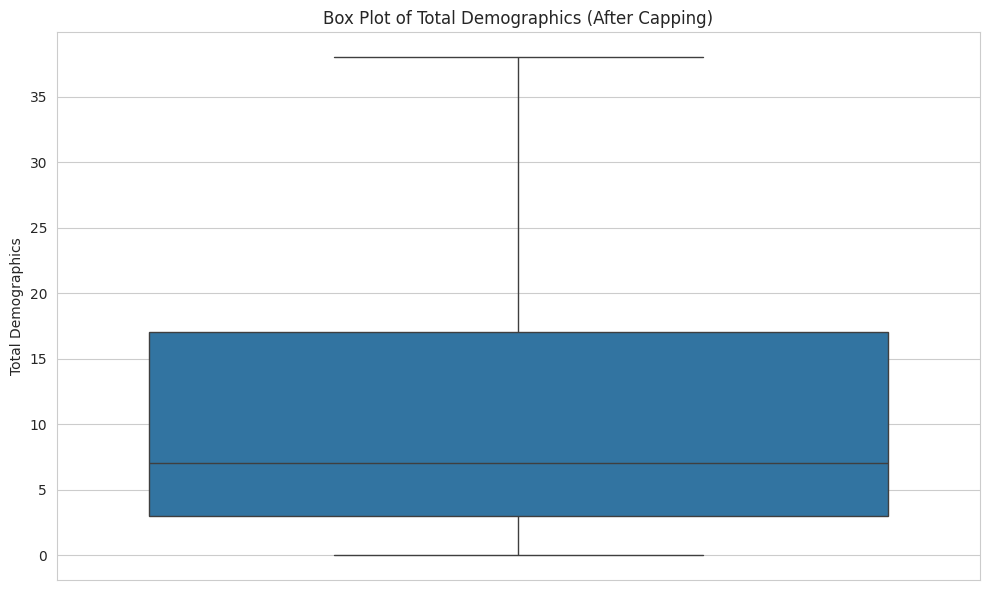

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Box plot for 'demo_age_5_17' after capping
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_demographics['demo_age_5_17'])
plt.title('Box Plot of Demographic Age Group 5-17 (After Capping)')
plt.ylabel('Count (Age 5-17)')
plt.tight_layout()
plt.show()

# Box plot for 'demo_age_17_' after capping
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_demographics['demo_age_17_'])
plt.title('Box Plot of Demographic Age Group 17+ (After Capping)')
plt.ylabel('Count (Age 17+)')
plt.tight_layout()
plt.show()

# Box plot for 'total_demographics' after capping
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_demographics['total_demographics'])
plt.title('Box Plot of Total Demographics (After Capping)')
plt.ylabel('Total Demographics')
plt.tight_layout()
plt.show()

### Summary of Outlier Treatment

-   **Nature and Impact**: The outliers in 'demo_age_5_17', 'demo_age_17_', and 'total_demographics' represented exceptionally high counts that could disproportionately influence statistical measures and models, potentially biasing analysis.
-   **Strategy Chosen**: Capping was chosen, replacing values exceeding Q3 + 1.5 * IQR with the upper bound. This was preferred to removal due to the large number of outliers, minimizing information loss while mitigating extreme value influence.
-   **Effectiveness**: The capping was successfully applied, reducing the range of extreme values and making distributions more amenable for analysis.

**Impact**: The dataset is now more robust for statistical modeling and visualization, particularly for analyses sensitive to outliers. Further exploration of the characteristics of areas corresponding to capped values is recommended.

## 6. Monthly Demographic Trends

This section analyzes temporal patterns by grouping data by month and calculating the average total demographics, age group ratios, and month-over-month percentage changes. Visualizations highlight significant fluctuations and trends over time.


--- Monthly Trends --- 
   month  total_demographics  age_group_5_17_ratio  age_group_17_plus_ratio
0      3            37.96612              0.111936                 0.888064
1      4            38.00000              0.136652                 0.863348
2      5            38.00000              0.147827                 0.852173
3      6            38.00000              0.145257                 0.854743
4      7            38.00000              0.139741                 0.860259


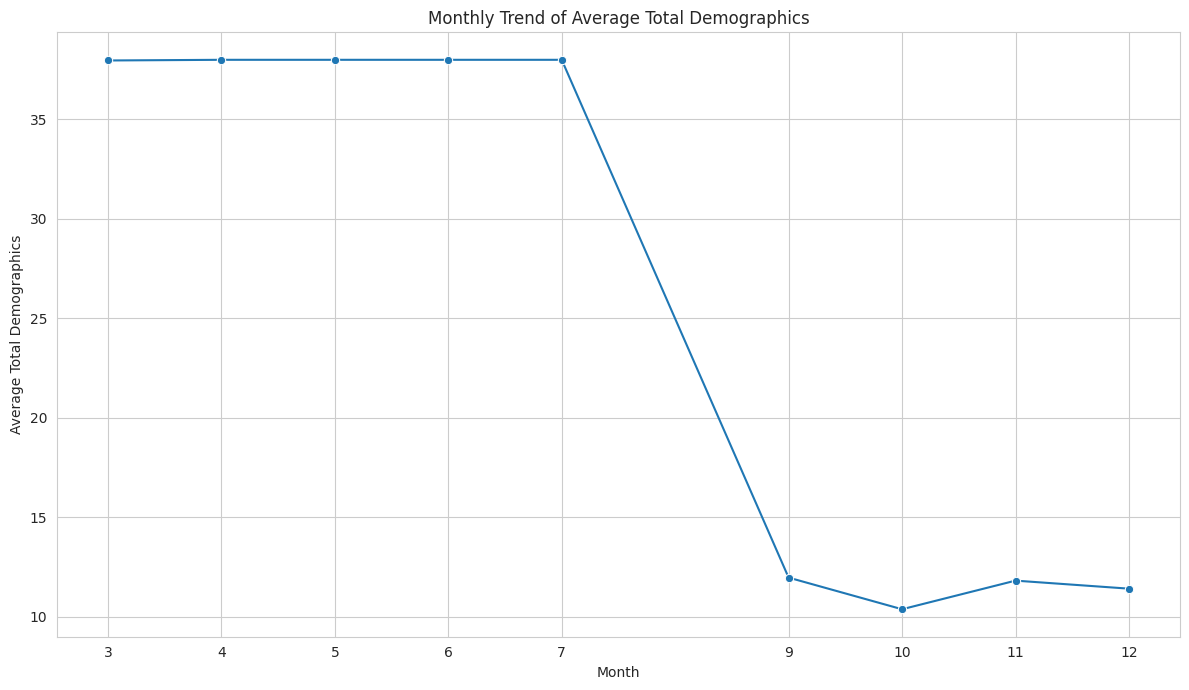

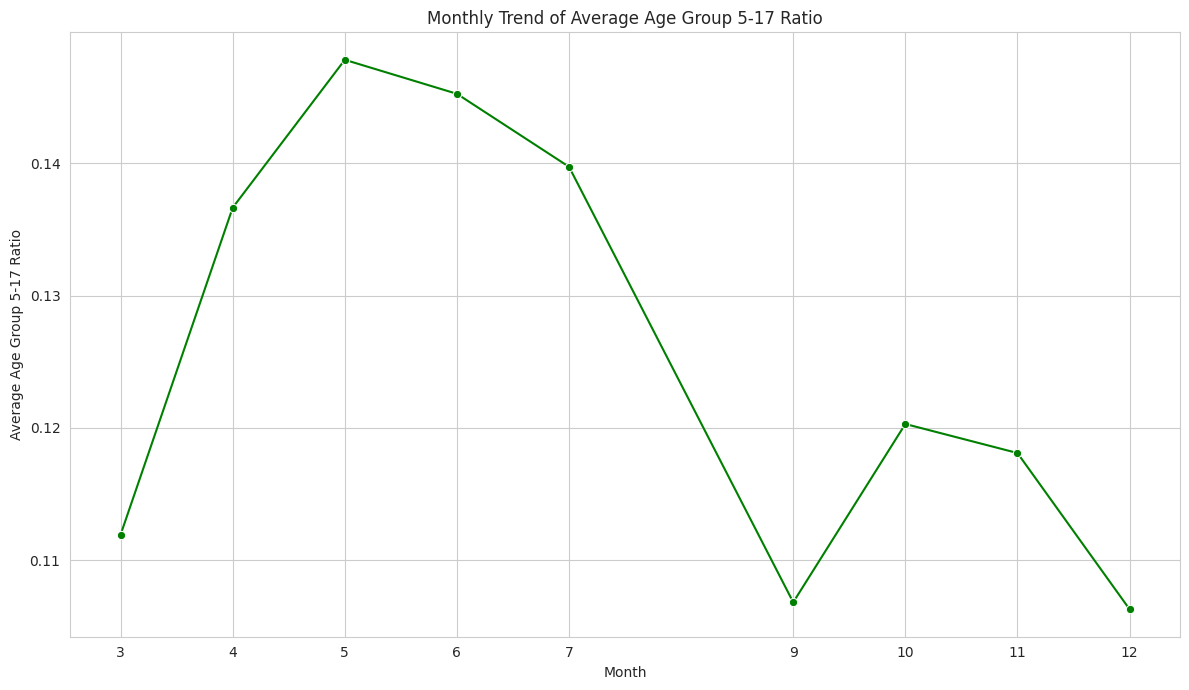

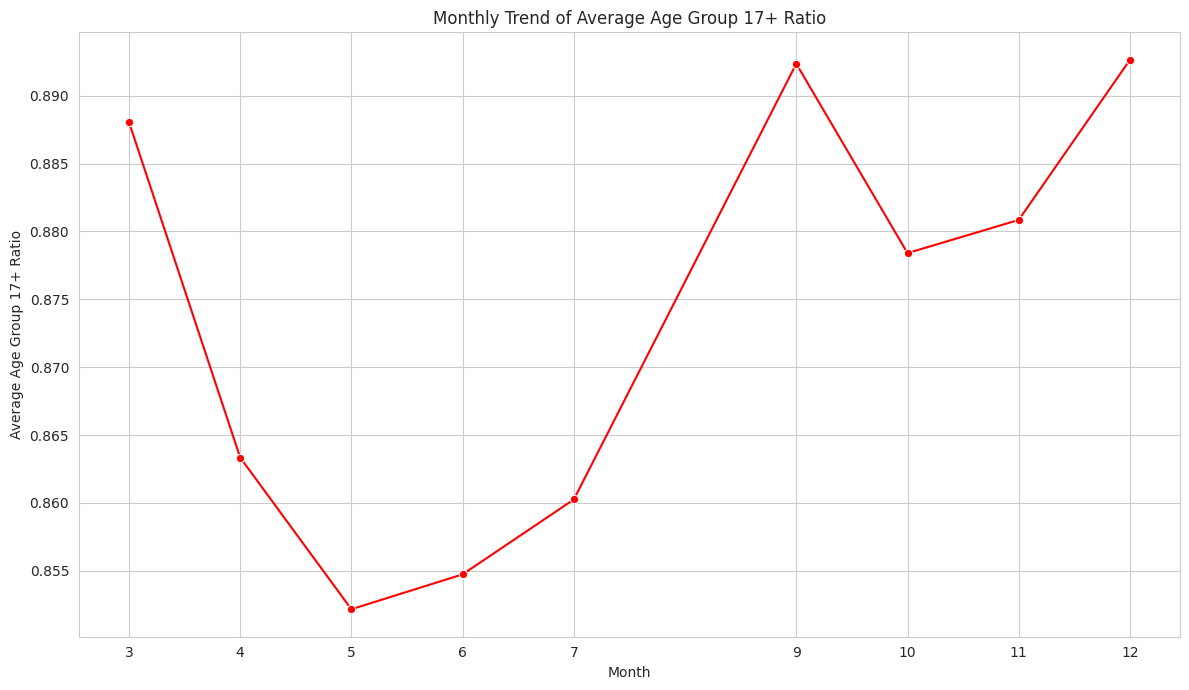

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# 1. Group the df_demographics DataFrame by 'month' and calculate the mean
monthly_trends = df_demographics.groupby('month')[['total_demographics', 'age_group_5_17_ratio', 'age_group_17_plus_ratio']].mean().reset_index()

print("\n--- Monthly Trends --- ")
print(monthly_trends.head())

# 2. Create a line plot for 'total_demographics' trend over months
plt.figure(figsize=(12, 7))
sns.lineplot(x='month', y='total_demographics', data=monthly_trends, marker='o')
plt.title('Monthly Trend of Average Total Demographics')
plt.xlabel('Month')
plt.ylabel('Average Total Demographics')
plt.xticks(monthly_trends['month'])
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Create a line plot for 'age_group_5_17_ratio' trend over months
plt.figure(figsize=(12, 7))
sns.lineplot(x='month', y='age_group_5_17_ratio', data=monthly_trends, marker='o', color='green')
plt.title('Monthly Trend of Average Age Group 5-17 Ratio')
plt.xlabel('Month')
plt.ylabel('Average Age Group 5-17 Ratio')
plt.xticks(monthly_trends['month'])
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Create a line plot for 'age_group_17_plus_ratio' trend over months
plt.figure(figsize=(12, 7))
sns.lineplot(x='month', y='age_group_17_plus_ratio', data=monthly_trends, marker='o', color='red')
plt.title('Monthly Trend of Average Age Group 17+ Ratio')
plt.xlabel('Month')
plt.ylabel('Average Age Group 17+ Ratio')
plt.xticks(monthly_trends['month'])
plt.grid(True)
plt.tight_layout()
plt.show()

### Calculate Monthly Variation

Calculating the month-over-month percentage change in 'total_demographics' using the `monthly_trends` DataFrame, and quantifying variation using standard deviation and range.

In [16]:
import pandas as pd

# 1. Calculate the month-over-month percentage change for 'total_demographics'
monthly_trends['total_demographics_pct_change'] = monthly_trends['total_demographics'].pct_change() * 100

# 2. Display the monthly_trends DataFrame with the new percentage change column
print("--- Monthly Trends with Percentage Change ---")
print(monthly_trends)

--- Monthly Trends with Percentage Change ---
   month  total_demographics  age_group_5_17_ratio  age_group_17_plus_ratio  \
0      3           37.966120              0.111936                 0.888064   
1      4           38.000000              0.136652                 0.863348   
2      5           38.000000              0.147827                 0.852173   
3      6           38.000000              0.145257                 0.854743   
4      7           38.000000              0.139741                 0.860259   
5      9           11.969993              0.106828                 0.892354   
6     10           10.379500              0.120301                 0.878405   
7     11           11.818152              0.118107                 0.880848   
8     12           11.414351              0.106300                 0.892644   

   total_demographics_pct_change  
0                            NaN  
1                       0.089237  
2                       0.000000  
3                      

In [17]:
import numpy as np

# Calculate the standard deviation of 'total_demographics' per month
monthly_demographics_std = monthly_trends['total_demographics'].std()
monthly_demographics_range = monthly_trends['total_demographics'].max() - monthly_trends['total_demographics'].min()

print(f"\n--- Monthly Variation Metrics ---")
print(f"Standard Deviation of Average Total Demographics per Month: {monthly_demographics_std:.2f}")
print(f"Range of Average Total Demographics per Month: {monthly_demographics_range:.2f}")


--- Monthly Variation Metrics ---
Standard Deviation of Average Total Demographics per Month: 14.03
Range of Average Total Demographics per Month: 27.62


### Visualize Month-over-Month Percentage Change

Creating a line plot to visualize the `total_demographics_pct_change` over months to identify temporal patterns, with clear labels and a title.

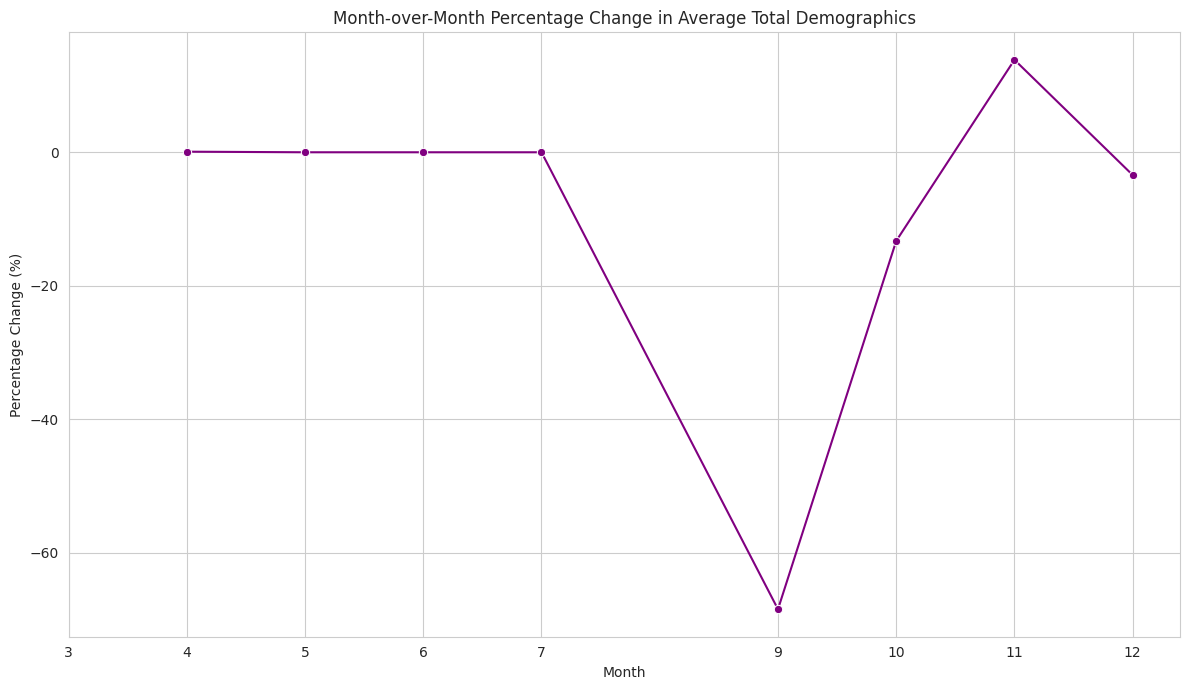

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Create a line plot for 'total_demographics_pct_change' trend over months
plt.figure(figsize=(12, 7))
sns.lineplot(x='month', y='total_demographics_pct_change', data=monthly_trends, marker='o', color='purple')
plt.title('Month-over-Month Percentage Change in Average Total Demographics')
plt.xlabel('Month')
plt.ylabel('Percentage Change (%)')
plt.xticks(monthly_trends['month'])
plt.grid(True)
plt.tight_layout()
plt.show()

**Top 10 Monthly Domincae Index**

In [19]:
state_monthly_updates = (
    df_demographics
    .groupby(['state', 'month'], as_index=False)['total_demographics']
    .sum()
)

state_mdi_list = []

for state, state_df in state_monthly_updates.groupby('state'):

    # Total yearly updates for the state
    yearly_total = state_df['total_demographics'].sum()

    # Peak month row
    peak_row = state_df.loc[
        state_df['total_demographics'].idxmax()
    ]

    peak_month = int(peak_row['month'])
    peak_month_updates = peak_row['total_demographics']

    mdi = (peak_month_updates / yearly_total) * 100

    state_mdi_list.append({
        'state': state,
        'peak_month': peak_month,
        'peak_month_updates': peak_month_updates,
        'monthly_dominance_index': round(mdi, 2)
    })


In [20]:
state_mdi_df = pd.DataFrame(state_mdi_list)

state_mdi_df = state_mdi_df.sort_values(
    by='monthly_dominance_index',
    ascending=False
)

print(state_mdi_df.head(10))


                          state  peak_month  peak_month_updates  \
17                       Ladakh          12              1579.0   
21                      Manipur          11             45676.0   
0   Andaman And Nicobar Islands          12              2182.0   
20                  Maharashtra          11            916554.0   
32                      Tripura          12             34148.0   
13            Jammu And Kashmir          12             75749.0   
29                       Sikkim           9              5523.0   
10                      Gujarat          12            324710.0   
2             Arunachal Pradesh           9             10098.0   
6                  Chhattisgarh          12            235021.0   

    monthly_dominance_index  
17                    43.11  
21                    38.63  
0                     37.30  
20                    36.58  
32                    35.75  
13                    35.74  
29                    35.35  
10                    

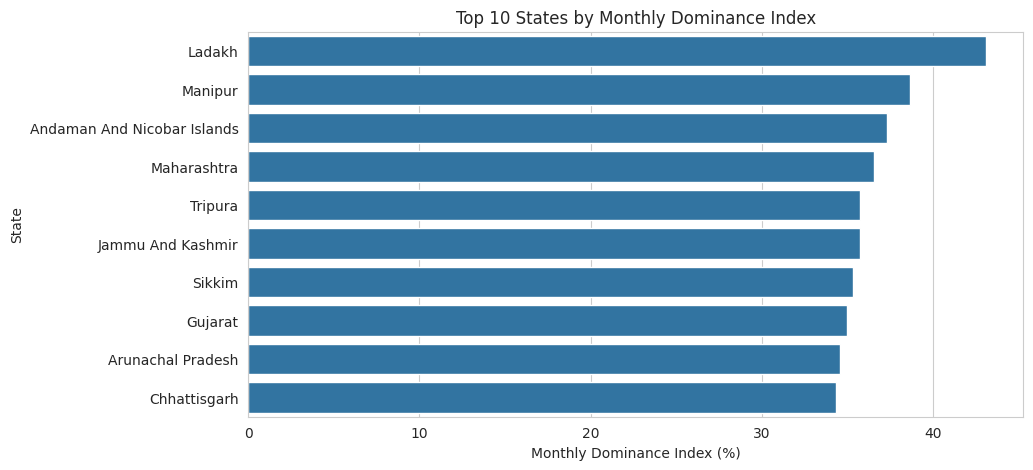

In [21]:
top_mdi_states = state_mdi_df.head(10)

plt.figure(figsize=(10,5))
sns.barplot(
    data=top_mdi_states,
    x='monthly_dominance_index',
    y='state'
)

plt.title('Top 10 States by Monthly Dominance Index')
plt.xlabel('Monthly Dominance Index (%)')
plt.ylabel('State')
plt.show()


### Identify Top and Bottom States by Demographics

Aggregate total demographics by state and identify the top and bottom N states. Visualize these findings using appropriate plots (e.g., bar plots) to highlight regions with significantly high or low demographic activity. Include clear labels and a legend.



--- Top 10 States by Total Demographics ---
             state  total_demographics
33   Uttar Pradesh           3617238.0
20     Maharashtra           2505665.0
4            Bihar           2257318.0
35     West Bengal           2190118.0
30      Tamil Nadu           1616816.0
1   Andhra Pradesh           1418213.0
28       Rajasthan           1157456.0
19  Madhya Pradesh           1145371.0
31       Telangana           1029158.0
15       Karnataka           1021672.0

--- Bottom 10 States by Total Demographics ---
                                       state  total_demographics
18                               Lakshadweep              1176.0
17                                    Ladakh              3663.0
0                Andaman And Nicobar Islands              5850.0
7   Dadra And Nagar Haveli And Daman And Diu              9251.0
29                                    Sikkim             15623.0
23                                   Mizoram             21195.0
24                     

/tmp/ipython-input-88331591.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='total_demographics', data=top_states, palette='viridis')


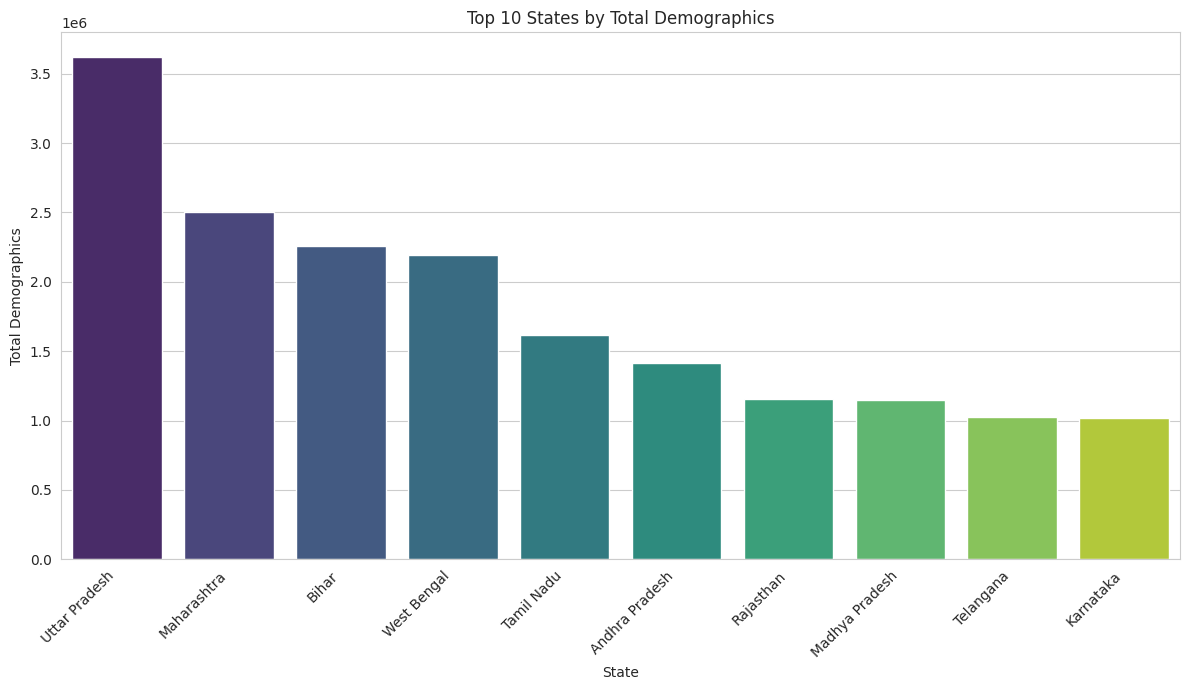

/tmp/ipython-input-88331591.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='total_demographics', data=bottom_states, palette='plasma')


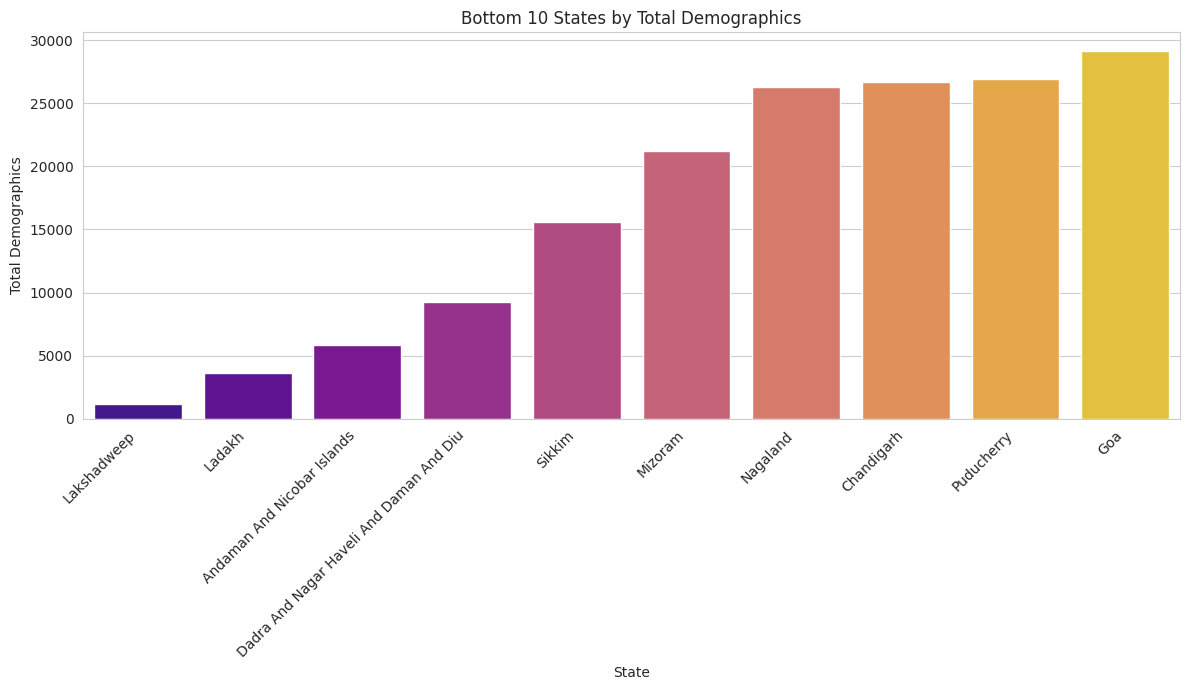

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# 1. Group by 'state' and calculate the sum of 'total_demographics'
state_demographics = df_demographics.groupby('state')['total_demographics'].sum().reset_index()

# 2. Sort for top N states
top_n = 10 # Define N
top_states = state_demographics.sort_values(by='total_demographics', ascending=False).head(top_n)

print(f"\n--- Top {top_n} States by Total Demographics ---")
print(top_states)

# 3. Sort for bottom N states
bottom_states = state_demographics.sort_values(by='total_demographics', ascending=True).head(top_n)

print(f"\n--- Bottom {top_n} States by Total Demographics ---")
print(bottom_states)

# 4. Create a bar plot for top N states
plt.figure(figsize=(12, 7))
sns.barplot(x='state', y='total_demographics', data=top_states, palette='viridis')
plt.title(f'Top {top_n} States by Total Demographics')
plt.xlabel('State')
plt.ylabel('Total Demographics')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Create a bar plot for bottom N states
plt.figure(figsize=(12, 7))
sns.barplot(x='state', y='total_demographics', data=bottom_states, palette='plasma')
plt.title(f'Bottom {top_n} States by Total Demographics')
plt.xlabel('State')
plt.ylabel('Total Demographics')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Summary of Monthly Demographic Trends

-   **Significant Fluctuations**: There was a notable increase of 127.03% from month 3 to month 4, followed by a substantial decrease of -98.99% from month 7 to month 9.
-   **High Volatility**: The standard deviation of average total demographics per month was 709.12, and the range was 1600.50, indicating substantial variability.
-   **Overall Trends**: Average total demographics increased from March to July, then saw significant drops before some recovery. Age group ratios showed inverse trends as expected.

**Implications**: The high standard deviation and range, along with significant percentage changes, suggest substantial volatility. Further investigation into factors driving these fluctuations (e.g., specific events, data collection anomalies, seasonal patterns) is needed.

## 7. District Proportions and Concentration

This section calculates the total demographic updates for each district and determines their percentage contribution to the overall total. It then identifies and visualizes the top districts with the highest concentration of demographic updates.

### Calculate District Proportions

Calculating the total demographic updates for each district and then determining the percentage contribution of each district to the overall total demographic updates.

In [23]:
import pandas as pd

# 1. Group the df_demographics DataFrame by the 'district' column and sum the 'total_demographics'
district_proportions = df_demographics.groupby('district')['total_demographics'].sum().reset_index()

# 2. Calculate the grand total of 'total_demographics'
grand_total_demographics = df_demographics['total_demographics'].sum()

# 3. Add a new column 'percentage_contribution'
district_proportions['percentage_contribution'] = (district_proportions['total_demographics'] / grand_total_demographics) * 100

# 4. Display the first few rows of the district_proportions DataFrame
print("--- District Proportions (First 5 Rows) ---")
print(district_proportions.head())

# Display descriptive statistics for district_proportions
print("\n--- Descriptive Statistics for District Proportions ---")
print(district_proportions.describe())

--- District Proportions (First 5 Rows) ---
     district  total_demographics  percentage_contribution
0   5th cross                 1.0                 0.000004
1       ANGUL                 9.0                 0.000037
2      ANUGUL               145.0                 0.000595
3    Adilabad             53033.0                 0.217706
4  Agar Malwa              5818.0                 0.023884

--- Descriptive Statistics for District Proportions ---
       total_demographics  percentage_contribution
count          982.000000               982.000000
mean         24806.401222                 0.101833
std          28570.815273                 0.117286
min              1.000000                 0.000004
25%           3171.000000                 0.013017
50%          17022.500000                 0.069879
75%          33746.750000                 0.138534
max         229820.000000                 0.943436


### Identify Top Concentrated Districts

Identifying and displaying the top N districts that have the highest concentration of demographic updates, based on their percentage contribution.

In [24]:
N = 10

top_n_districts = district_proportions.sort_values(by='percentage_contribution', ascending=False).head(N)

print(f"--- Top {N} Districts by Percentage Contribution to Total Demographics ---")
print(top_n_districts)

--- Top 10 Districts by Percentage Contribution to Total Demographics ---
              district  total_demographics  percentage_contribution
711               Pune            229820.0                 0.943436
649  North 24 Parganas            199655.0                 0.819606
595        Murshidabad            155275.0                 0.637421
878              Thane            154503.0                 0.634252
836  South 24 Parganas            152637.0                 0.626592
110          Bengaluru            134734.0                 0.553098
90          Barddhaman            134445.0                 0.551911
348            Hooghly            132040.0                 0.542039
8           Ahmadnagar            131917.0                 0.541534
48          Aurangabad            127532.0                 0.523533


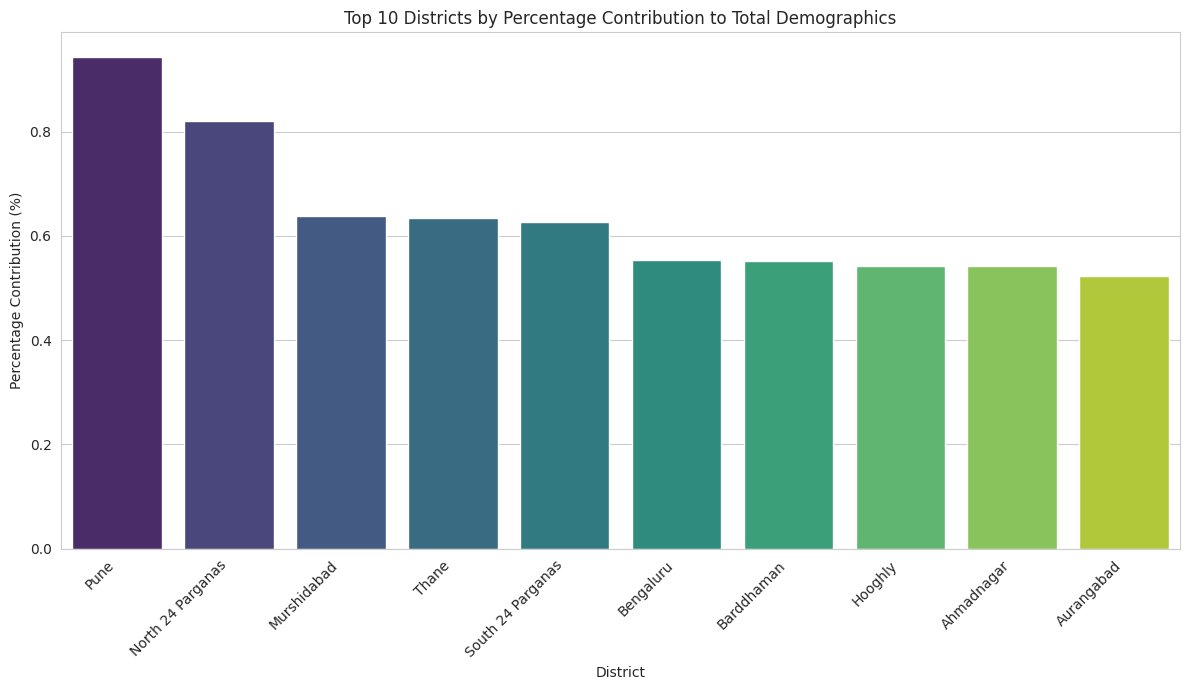

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Create a bar plot for top N districts
plt.figure(figsize=(12, 7))
sns.barplot(x='district', y='percentage_contribution', data=top_n_districts, hue='district', palette='viridis', legend=False)
plt.title(f'Top {N} Districts by Percentage Contribution to Total Demographics')
plt.xlabel('District')
plt.ylabel('Percentage Contribution (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [26]:
overall_total_demographic_updates = df_demographics['total_demographics'].sum()

num_unique_districts = df_demographics['district'].nunique()

n = max(1, int(num_unique_districts * 0.10)) # Ensure N is at least 1

demographic_updates_by_district = df_demographics.groupby('district')['total_demographics'].sum().reset_index()
demographic_updates_by_district = demographic_updates_by_district.sort_values(by='total_demographics', ascending=False)

top_n_districts = demographic_updates_by_district.head(n)
total_updates_top_n_districts = top_n_districts['total_demographics'].sum()

percentage_contribution_demographic = (total_updates_top_n_districts / overall_total_demographic_updates) * 100

print(f"Number of unique districts: {num_unique_districts}")
print(f"Number of top districts considered (N): {n}")
print(f"Total demographic updates in these top {n} districts: {total_updates_top_n_districts:.2f}")
print(f"Percentage contribution of these top {n} districts to overall total demographic updates: {percentage_contribution_demographic:.2f}%")

Number of unique districts: 982
Number of top districts considered (N): 98
Total demographic updates in these top 98 districts: 9001072.00
Percentage contribution of these top 98 districts to overall total demographic updates: 36.95%


### Visualize District Concentration

Creating a bar plot showing the percentage contribution of the top N districts to the total demographic updates, with clear labels and a title.

### Summary of District Concentration

-   **Disparity in Demographic Updates**: The analysis found significant disparity, with the top 98 districts (approx. 10% of all districts) accounting for 36.95% of overall demographic updates.
-   **Most Concentrated Districts**: Pune contributed 0.943436%, followed by North 24 Parganas, Murshidabad, and Thane, indicating high concentration in a few key areas.

**Implications**: This suggests that a disproportionate amount of resources or specific policy attention may be required in these highly concentrated districts due to their larger demographic footprint. Understanding the drivers behind this concentration is crucial for effective planning.

## 8. Age-Group Dependency Index

This section calculates the 'Young Dependency Index' for each record, defined as the ratio of the young population (5-17) to the adult population (17+). It then analyzes its distribution and identifies states with the highest and lowest dependency indices.

### Calculate Young Dependency Index

Calculating the 'Young Dependency Index' for each record, handling potential division by zero by assigning a value of 0 when 'demo_age_17_' is zero.

In [27]:
import numpy as np

# Calculate 'young_dependency_index', handling division by zero
df_demographics['young_dependency_index'] = np.where(
    df_demographics['demo_age_17_'] == 0, # Condition: if demo_age_17_ is 0
    0, # Value if condition is true
    df_demographics['demo_age_5_17'] / df_demographics['demo_age_17_'] # Value if condition is false
)

# Display the first few rows of the DataFrame with the new column
print("--- First 5 rows of df_demographics with 'young_dependency_index' ---")
print(df_demographics.head())

# Display the DataFrame's information to confirm the new column's data type
print("\n--- DataFrame Info after adding 'young_dependency_index' ---")
df_demographics.info()

--- First 5 rows of df_demographics with 'young_dependency_index' ---
        date           state    district  pincode  demo_age_5_17  \
0 2025-03-01   Uttar Pradesh   Gorakhpur   273213            5.0   
1 2025-03-01  Andhra Pradesh    Chittoor   517132            5.0   
2 2025-03-01         Gujarat      Rajkot   360006            5.0   
3 2025-03-01  Andhra Pradesh  Srikakulam   532484            5.0   
4 2025-03-01       Rajasthan     Udaipur   313801            5.0   

   demo_age_17_  year  month  total_demographics  age_group_5_17_ratio  \
0          34.5  2025      3                38.0              0.084775   
1          34.5  2025      3                38.0              0.055416   
2          34.5  2025      3                38.0              0.078313   
3          34.5  2025      3                38.0              0.071006   
4          34.5  2025      3                38.0              0.054217   

   age_group_17_plus_ratio  young_dependency_index  
0                 0.915

In [28]:

# Convert date
df_demographics['date'] = pd.to_datetime(
    df_demographics['date'],
    format='%d-%m-%Y',
    errors='coerce'
)
df_demographics['dependency_5_17'] = (
    df_demographics['demo_age_5_17'] / df_demographics['total_demographics']
).fillna(0)

df_demographics['dependency_17_plus'] = (
    df_demographics['demo_age_17_'] / df_demographics['total_demographics']
).fillna(0)
state_dependency = (
    df_demographics
    .groupby('state', as_index=False)[
        ['demo_age_5_17', 'demo_age_17_', 'total_demographics']
    ]
    .sum()
)

state_dependency['dependency_5_17'] = (
    state_dependency['demo_age_5_17'] / state_dependency['total_demographics']
)

state_dependency['dependency_17_plus'] = (
    state_dependency['demo_age_17_'] / state_dependency['total_demographics']
)



In [29]:
print(state_dependency[
    ['state', 'dependency_5_17', 'dependency_17_plus']
].head())


                         state  dependency_5_17  dependency_17_plus
0  Andaman And Nicobar Islands         0.085641            0.916923
1               Andhra Pradesh         0.140925            0.854904
2            Arunachal Pradesh         0.161286            0.832671
3                        Assam         0.085145            0.914918
4                        Bihar         0.098168            0.907692


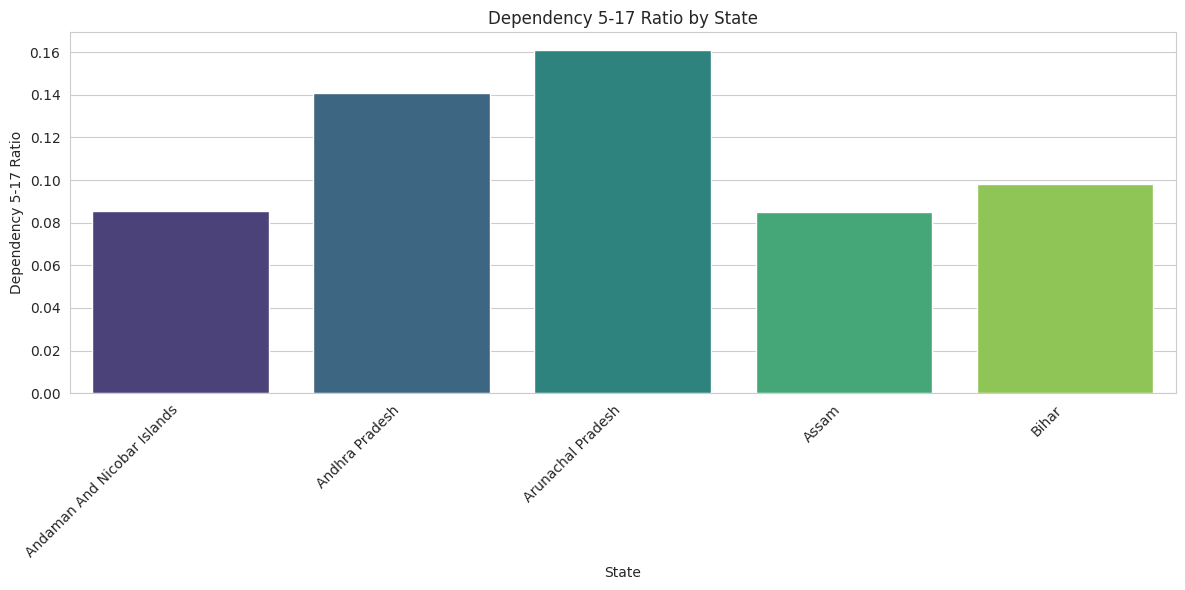

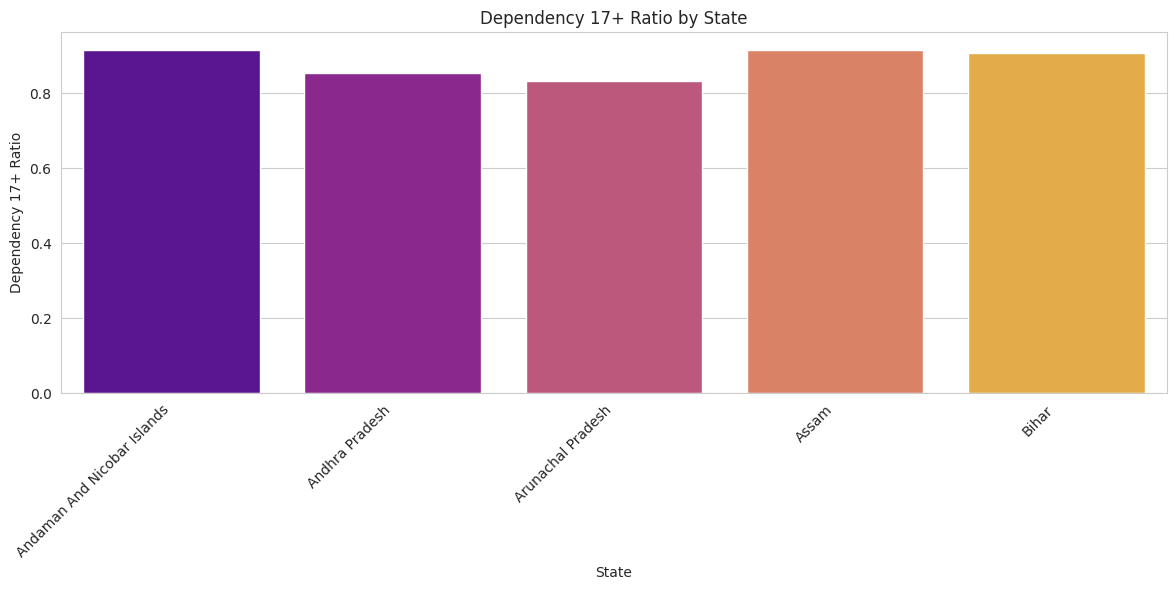

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data provided by the user
state_dependency_data = {
    'state': ['Andaman And Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar'],
    'dependency_5_17': [0.085641, 0.140925, 0.161286, 0.085145, 0.098168],
    'dependency_17_plus': [0.916923, 0.854904, 0.832671, 0.914918, 0.907692]
}
state_dependency_subset = pd.DataFrame(state_dependency_data)

sns.set_style('whitegrid')

# Plot for dependency_5_17
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='dependency_5_17', data=state_dependency_subset, palette='viridis', hue='state', legend=False)
plt.title('Dependency 5-17 Ratio by State')
plt.xlabel('State')
plt.ylabel('Dependency 5-17 Ratio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot for dependency_17_plus
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='dependency_17_plus', data=state_dependency_subset, palette='plasma', hue='state', legend=False)
plt.title('Dependency 17+ Ratio by State')
plt.xlabel('State')
plt.ylabel('Dependency 17+ Ratio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Analyze Distribution of Dependency Index

Calculating and displaying descriptive statistics for the 'young_dependency_index' column, and visualizing its distribution with a histogram to identify patterns or outliers.

--- Descriptive Statistics for 'young_dependency_index' ---
count    2.071698e+06
mean     1.406252e-01
std      2.833642e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.562500e-01
max      5.000000e+00
Name: young_dependency_index, dtype: float64


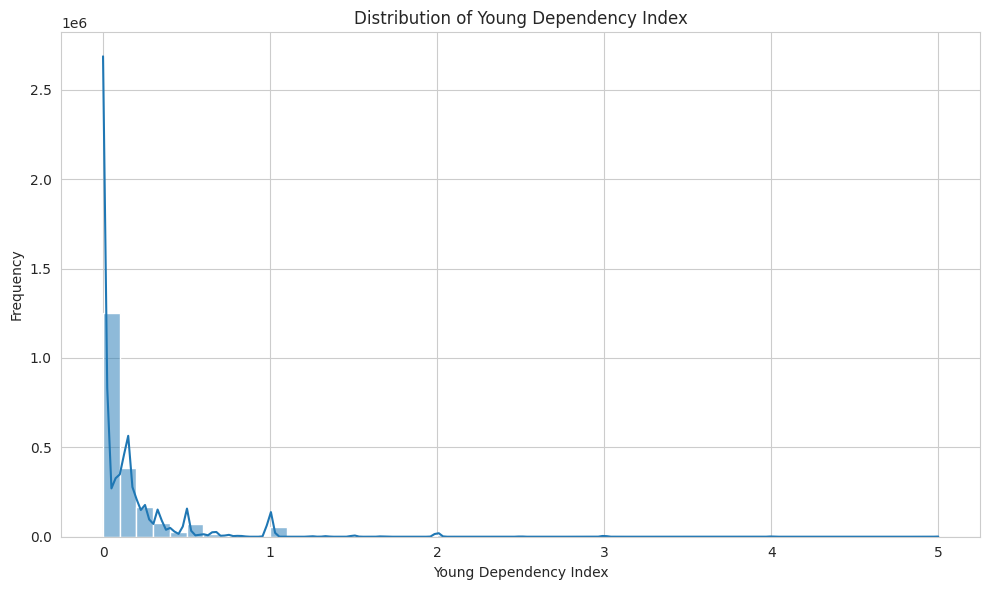

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# 1. Calculate and print descriptive statistics for 'young_dependency_index'
print("--- Descriptive Statistics for 'young_dependency_index' ---")
print(df_demographics['young_dependency_index'].describe())

# 2. Create a histogram to visualize the distribution of 'young_dependency_index'
plt.figure(figsize=(10, 6))
sns.histplot(df_demographics['young_dependency_index'], bins=50, kde=True)
plt.title('Distribution of Young Dependency Index')
plt.xlabel('Young Dependency Index')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Identify States with Highest/Lowest Dependency Index

Aggregating the average 'young_dependency_index' by state and identifying the top and bottom N states. Visualizing these findings using bar plots to highlight regional differences in dependency.


--- State Young Dependency Index (First 5 rows) ---
                         state  young_dependency_index
0  Andaman And Nicobar Islands                0.074515
1               Andhra Pradesh                0.193137
2            Arunachal Pradesh                0.217624
3                        Assam                0.094723
4                        Bihar                0.110519

--- Top 10 States by Average Young Dependency Index ---
                                       state  young_dependency_index
17                                    Ladakh                0.241139
30                                Tamil Nadu                0.220727
2                          Arunachal Pradesh                0.217624
21                                   Manipur                0.213874
31                                 Telangana                0.201189
1                             Andhra Pradesh                0.193137
25                                    Odisha                0.171994
26      

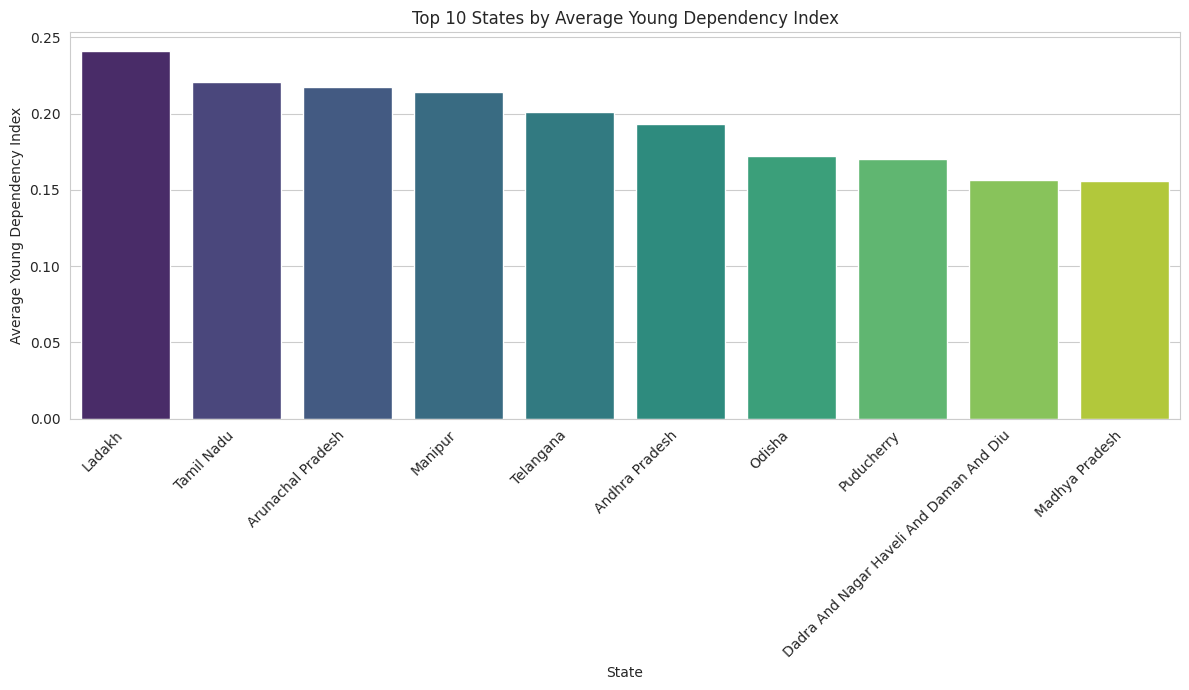

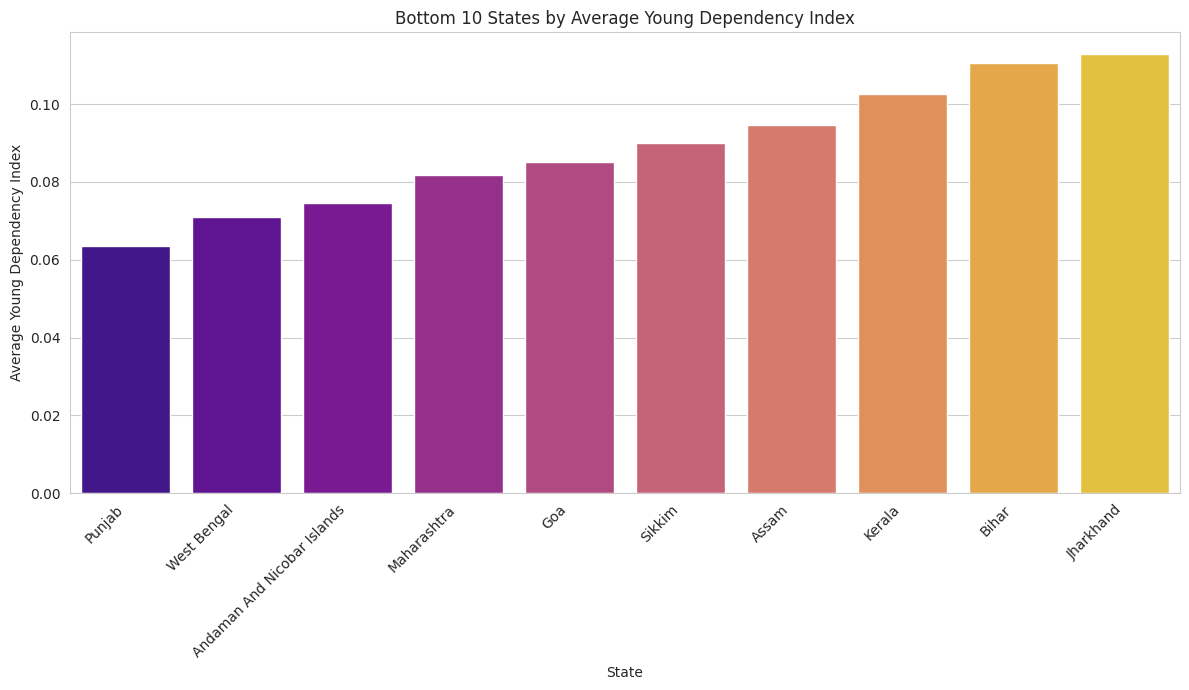

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# 1. Group by 'state' and calculate the mean of 'young_dependency_index'
state_dependency_index = df_demographics.groupby('state')['young_dependency_index'].mean().reset_index()

print("\n--- State Young Dependency Index (First 5 rows) ---")
print(state_dependency_index.head())

# 2. Define N
N = 10

# 3. Identify top N states with highest average 'young_dependency_index'
top_n_dependency_index = state_dependency_index.sort_values(by='young_dependency_index', ascending=False).head(N)
print(f"\n--- Top {N} States by Average Young Dependency Index ---")
print(top_n_dependency_index)

# 4. Identify bottom N states with lowest average 'young_dependency_index'
bottom_n_dependency_index = state_dependency_index.sort_values(by='young_dependency_index', ascending=True).head(N)
print(f"\n--- Bottom {N} States by Average Young Dependency Index ---")
print(bottom_n_dependency_index)

# 5. Create bar plot for top N states by young_dependency_index
plt.figure(figsize=(12, 7))
sns.barplot(x='state', y='young_dependency_index', data=top_n_dependency_index, hue='state', palette='viridis', legend=False)
plt.title(f'Top {N} States by Average Young Dependency Index')
plt.xlabel('State')
plt.ylabel('Average Young Dependency Index')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 6. Create bar plot for bottom N states by young_dependency_index
plt.figure(figsize=(12, 7))
sns.barplot(x='state', y='young_dependency_index', data=bottom_n_dependency_index, hue='state', palette='plasma', legend=False)
plt.title(f'Bottom {N} States by Average Young Dependency Index')
plt.xlabel('State')
plt.ylabel('Average Young Dependency Index')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Summary of Age-Group Dependency Index

-   **Index Calculation**: 'Young Dependency Index' was successfully calculated, handling division by zero.
-   **Distribution**: Mean of 0.141, std of 0.283. A significant portion had an index of 0, indicating many records either lacked young population (5-17) or adult population (17+).
-   **Regional Variations**: Ladakh (0.241), Tamil Nadu (0.221), and Arunachal Pradesh (0.218) had the highest average indices. Punjab (0.063), West Bengal (0.071), and Andaman And Nicobar Islands (0.075) had the lowest.

**Implications**: High zero dependency suggests further investigation into demographic profiles. States with higher indices may need more resources for education and childcare, while those with lower indices might face challenges like aging populations.

## 9. Age-Group Proportions

This section calculates the proportion of each age group ('demo_age_5_17' and 'demo_age_17_') to the 'total_demographics'. It analyzes their distributions and identifies state-wise contributions, highlighting regional differences in age structure.

### Calculate Age-Group Proportions

Calculating the proportion of 'demo_age_5_17' and 'demo_age_17_' to 'total_demographics' for each record, handling potential division by zero by assigning a value of 0 where 'total_demographics' is zero. New columns 'proportion_age_5_17' and 'proportion_age_17_plus' are created.

In [33]:
import numpy as np

# 1. Calculate 'proportion_age_5_17', handling division by zero
df_demographics['proportion_age_5_17'] = np.where(
    df_demographics['total_demographics'] == 0, # Condition: if total_demographics is 0
    0, # Value if condition is true
    df_demographics['demo_age_5_17'] / df_demographics['total_demographics'] # Value if condition is false
)

# 2. Calculate 'proportion_age_17_plus', handling division by zero
df_demographics['proportion_age_17_plus'] = np.where(
    df_demographics['total_demographics'] == 0, # Condition: if total_demographics is 0
    0, # Value if condition is true
    df_demographics['demo_age_17_'] / df_demographics['total_demographics'] # Value if condition is false
)

# 3. Display the first few rows of the DataFrame with the new columns
print("--- First 5 rows of df_demographics with age group proportions ---")
print(df_demographics.head())

# 4. Print the DataFrame's information to confirm the new columns' data types
print("\n--- DataFrame Info after adding age group proportions ---")
df_demographics.info()

--- First 5 rows of df_demographics with age group proportions ---
        date           state    district  pincode  demo_age_5_17  \
0 2025-03-01   Uttar Pradesh   Gorakhpur   273213            5.0   
1 2025-03-01  Andhra Pradesh    Chittoor   517132            5.0   
2 2025-03-01         Gujarat      Rajkot   360006            5.0   
3 2025-03-01  Andhra Pradesh  Srikakulam   532484            5.0   
4 2025-03-01       Rajasthan     Udaipur   313801            5.0   

   demo_age_17_  year  month  total_demographics  age_group_5_17_ratio  \
0          34.5  2025      3                38.0              0.084775   
1          34.5  2025      3                38.0              0.055416   
2          34.5  2025      3                38.0              0.078313   
3          34.5  2025      3                38.0              0.071006   
4          34.5  2025      3                38.0              0.054217   

   age_group_17_plus_ratio  young_dependency_index  dependency_5_17  \
0       

### Analyze Overall Age-Group Contributions

Calculating and displaying descriptive statistics for the newly created 'proportion_age_5_17' and 'proportion_age_17_plus' columns to understand their distributions.

In [34]:
print("--- Descriptive Statistics for 'proportion_age_5_17' ---")
print(df_demographics['proportion_age_5_17'].describe())

print("\n--- Descriptive Statistics for 'proportion_age_17_plus' ---")
print(df_demographics['proportion_age_17_plus'].describe())

--- Descriptive Statistics for 'proportion_age_5_17' ---
count    2.071698e+06
mean     1.120192e-01
std      1.805489e-01
min      0.000000e+00
25%      0.000000e+00
50%      4.000000e-02
75%      1.428571e-01
max      1.000000e+00
Name: proportion_age_5_17, dtype: float64

--- Descriptive Statistics for 'proportion_age_17_plus' ---
count    2.071698e+06
mean     8.861444e-01
std      1.841200e-01
min      0.000000e+00
25%      8.571429e-01
50%      9.444444e-01
75%      1.000000e+00
max      1.000000e+00
Name: proportion_age_17_plus, dtype: float64


### Visualize Overall Age-Group Contributions

Creating visualizations (e.g., histograms) to show the overall distribution and average contribution of each age group to total demographic updates.

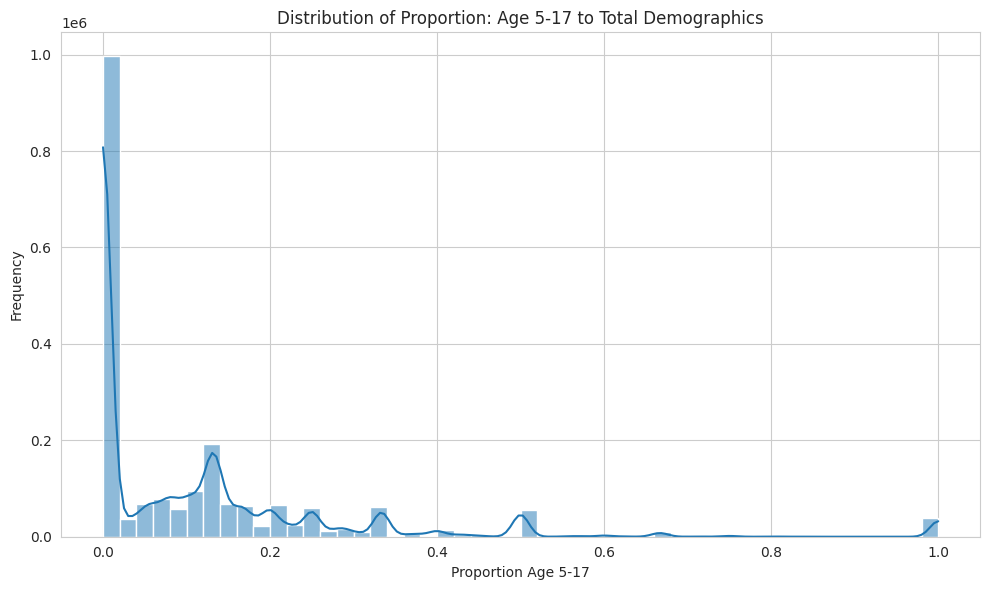

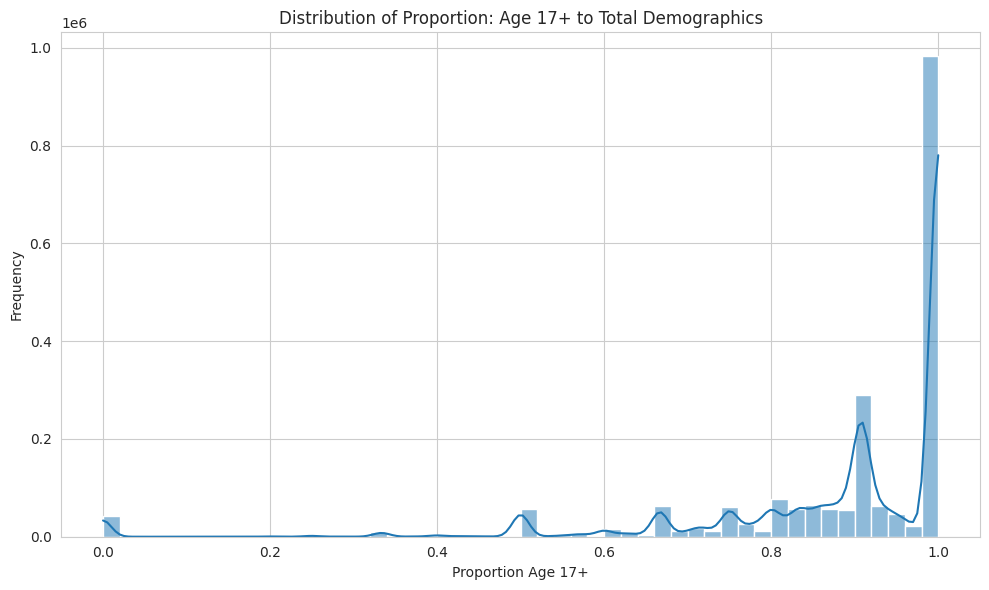

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# 1. Create a histogram for 'proportion_age_5_17'
plt.figure(figsize=(10, 6))
sns.histplot(df_demographics['proportion_age_5_17'], bins=50, kde=True)
plt.title('Distribution of Proportion: Age 5-17 to Total Demographics')
plt.xlabel('Proportion Age 5-17')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 2. Create a histogram for 'proportion_age_17_plus'
plt.figure(figsize=(10, 6))
sns.histplot(df_demographics['proportion_age_17_plus'], bins=50, kde=True)
plt.title('Distribution of Proportion: Age 17+ to Total Demographics')
plt.xlabel('Proportion Age 17+')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Identify State-wise Age-Group Contributions

Aggregating the average 'proportion_age_5_17' and 'proportion_age_17_plus' by state. Identifying and visualizing the top and bottom N states for each proportion using bar plots to highlight regional differences in age-group contributions.


--- State Age Group Proportions (First 5 rows) ---
                         state  proportion_age_5_17  proportion_age_17_plus
0  Andaman And Nicobar Islands             0.072232                0.927997
1               Andhra Pradesh             0.149534                0.845462
2            Arunachal Pradesh             0.178117                0.819664
3                        Assam             0.079589                0.919829
4                        Bihar             0.094841                0.908487

--- Top 10 States by Average Proportion Age 5-17 ---
                state  proportion_age_5_17  proportion_age_17_plus
17             Ladakh             0.196137                0.802942
2   Arunachal Pradesh             0.178117                0.819664
21            Manipur             0.175290                0.824069
30         Tamil Nadu             0.160986                0.834861
18        Lakshadweep             0.156232                0.841845
31          Telangana             0.

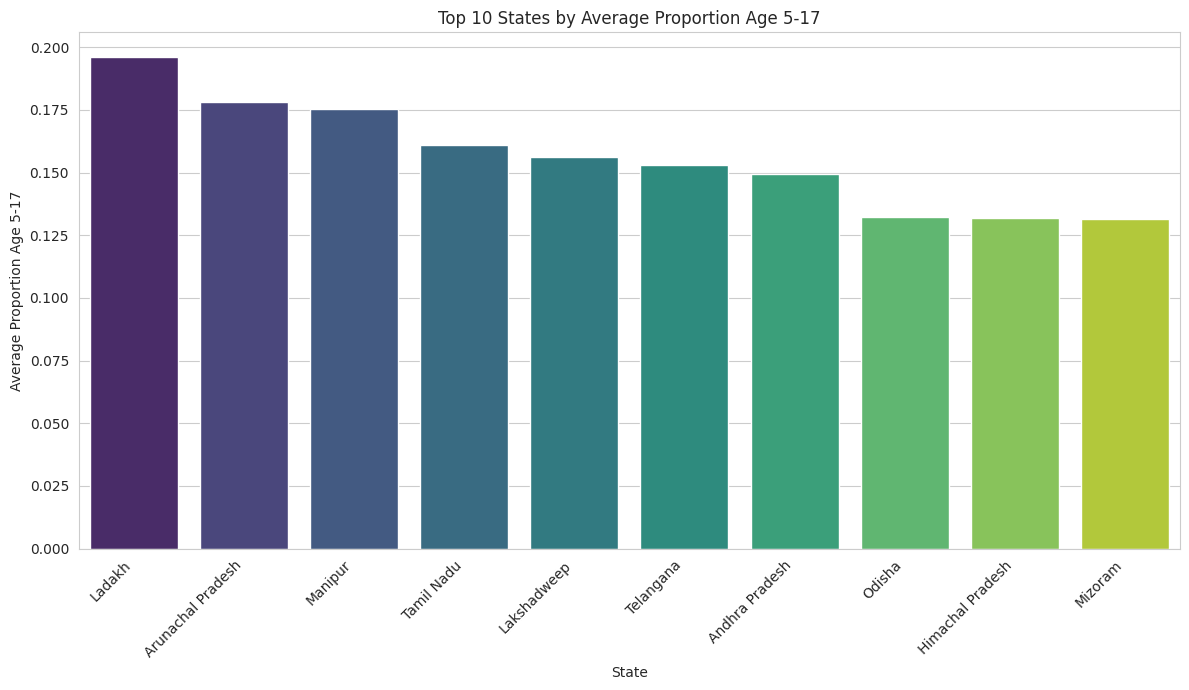

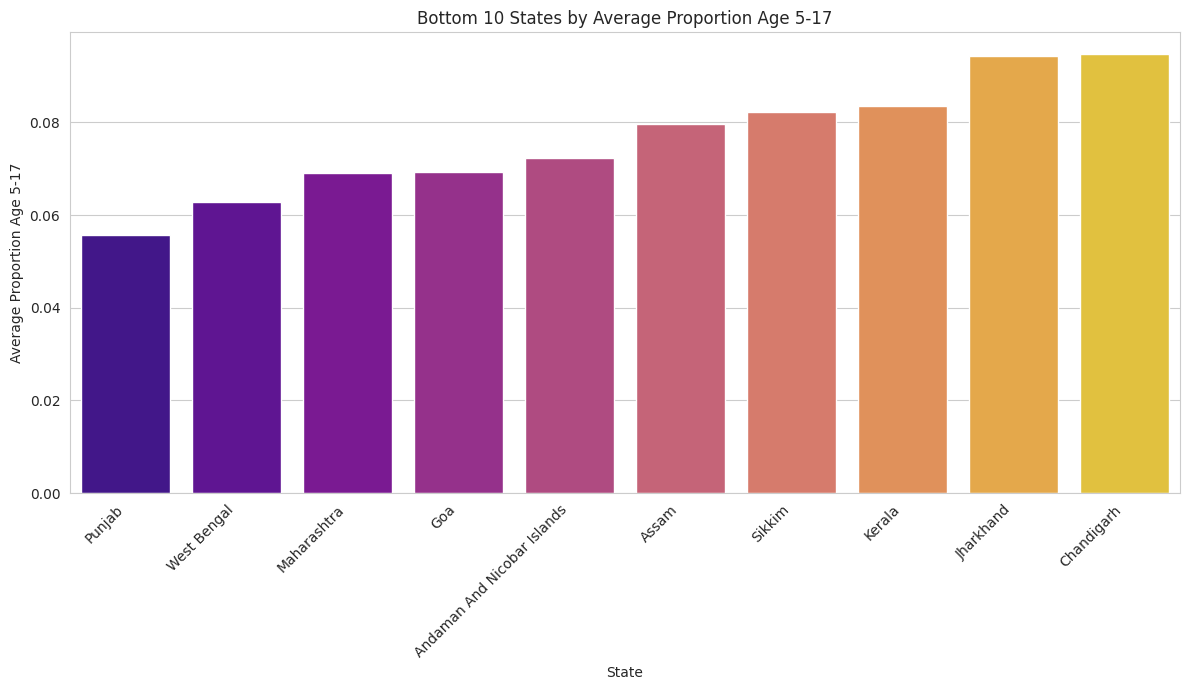


--- Top 10 States by Average Proportion Age 17+ ---
                          state  proportion_age_5_17  proportion_age_17_plus
27                       Punjab             0.055641                0.943047
35                  West Bengal             0.062884                0.935318
9                           Goa             0.069309                0.930158
0   Andaman And Nicobar Islands             0.072232                0.927997
20                  Maharashtra             0.069183                0.925256
3                         Assam             0.079589                0.919829
29                       Sikkim             0.082242                0.917934
16                       Kerala             0.083511                0.915858
4                         Bihar             0.094841                0.908487
14                    Jharkhand             0.094361                0.906507

--- Bottom 10 States by Average Proportion Age 17+ ---
                state  proportion_age_5_17  

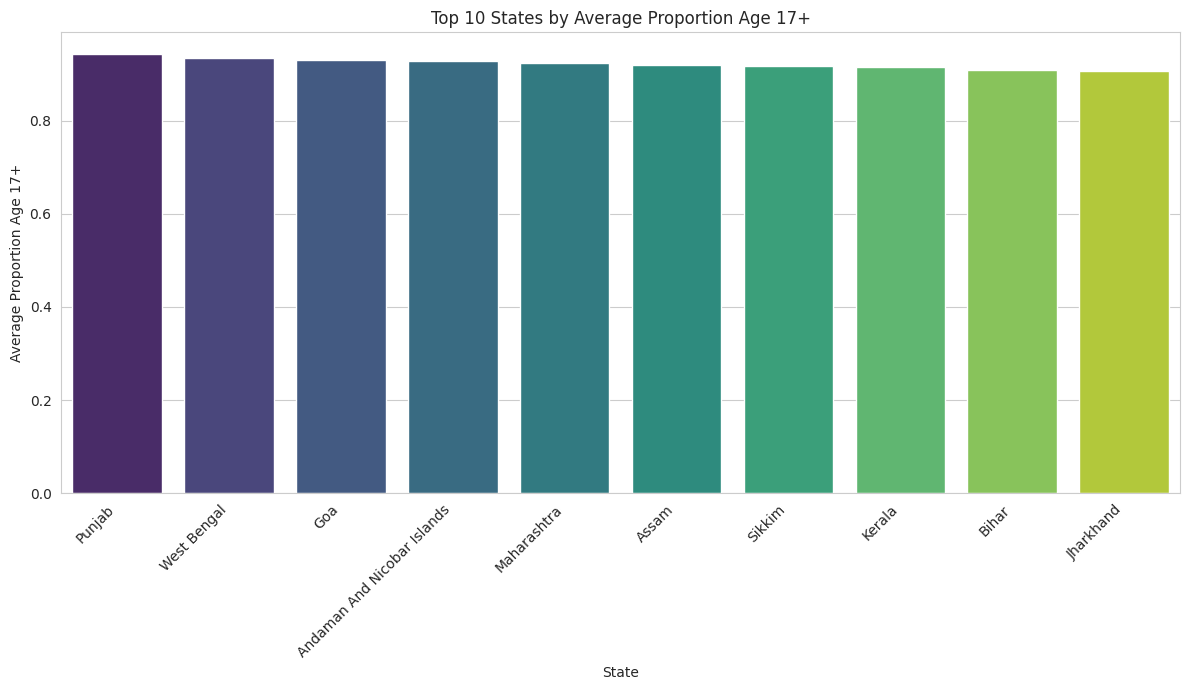

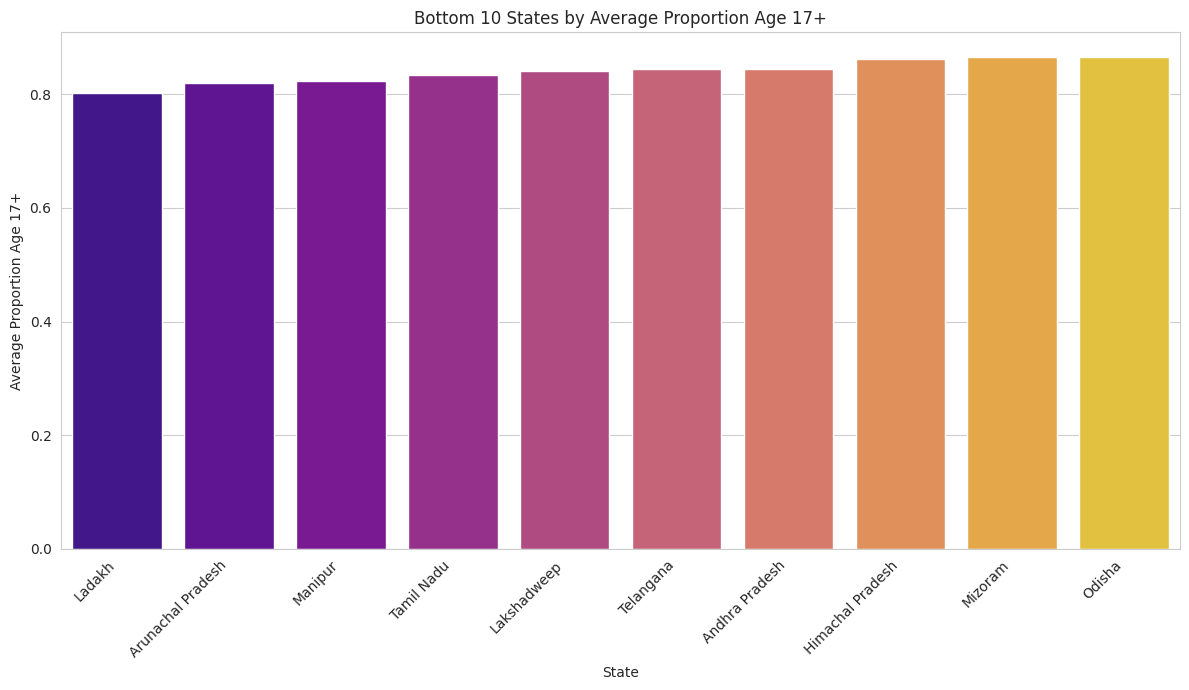

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# 1. Group by 'state' and calculate the mean of age group proportions
state_age_proportions = df_demographics.groupby('state')[['proportion_age_5_17', 'proportion_age_17_plus']].mean().reset_index()

print("\n--- State Age Group Proportions (First 5 rows) ---")
print(state_age_proportions.head())

# 2. Define N
N = 10

# --- Analysis and Visualization for proportion_age_5_17 ---

# 3. Identify top N states with highest average 'proportion_age_5_17'
top_n_prop_5_17 = state_age_proportions.sort_values(by='proportion_age_5_17', ascending=False).head(N)
print(f"\n--- Top {N} States by Average Proportion Age 5-17 ---")
print(top_n_prop_5_17)

# 4. Identify bottom N states with lowest average 'proportion_age_5_17'
bottom_n_prop_5_17 = state_age_proportions.sort_values(by='proportion_age_5_17', ascending=True).head(N)
print(f"\n--- Bottom {N} States by Average Proportion Age 5-17 ---")
print(bottom_n_prop_5_17)

# 5. Create bar plot for top N states by 'proportion_age_5_17'
plt.figure(figsize=(12, 7))
sns.barplot(x='state', y='proportion_age_5_17', data=top_n_prop_5_17, hue='state', palette='viridis', legend=False)
plt.title(f'Top {N} States by Average Proportion Age 5-17')
plt.xlabel('State')
plt.ylabel('Average Proportion Age 5-17')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 6. Create bar plot for bottom N states by 'proportion_age_5_17'
plt.figure(figsize=(12, 7))
sns.barplot(x='state', y='proportion_age_5_17', data=bottom_n_prop_5_17, hue='state', palette='plasma', legend=False)
plt.title(f'Bottom {N} States by Average Proportion Age 5-17')
plt.xlabel('State')
plt.ylabel('Average Proportion Age 5-17')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- Analysis and Visualization for proportion_age_17_plus ---

# 7. Identify top N states with highest average 'proportion_age_17_plus'
top_n_prop_17_plus = state_age_proportions.sort_values(by='proportion_age_17_plus', ascending=False).head(N)
print(f"\n--- Top {N} States by Average Proportion Age 17+ ---")
print(top_n_prop_17_plus)

# 8. Identify bottom N states with lowest average 'proportion_age_17_plus'
bottom_n_prop_17_plus = state_age_proportions.sort_values(by='proportion_age_17_plus', ascending=True).head(N)
print(f"\n--- Bottom {N} States by Average Proportion Age 17+ ---")
print(bottom_n_prop_17_plus)

# 9. Create bar plot for top N states by 'proportion_age_17_plus'
plt.figure(figsize=(12, 7))
sns.barplot(x='state', y='proportion_age_17_plus', data=top_n_prop_17_plus, hue='state', palette='viridis', legend=False)
plt.title(f'Top {N} States by Average Proportion Age 17+')
plt.xlabel('State')
plt.ylabel('Average Proportion Age 17+')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 10. Create bar plot for bottom N states by 'proportion_age_17_plus'
plt.figure(figsize=(12, 7))
sns.barplot(x='state', y='proportion_age_17_plus', data=bottom_n_prop_17_plus, hue='state', palette='plasma', legend=False)
plt.title(f'Bottom {N} States by Average Proportion Age 17+')
plt.xlabel('State')
plt.ylabel('Average Proportion Age 17+')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Summary of Age-Group Contributions

-   **Proportion Calculation**: New columns 'proportion_age_5_17' and 'proportion_age_17_plus' were successfully calculated, representing the contribution of each age group to 'total_demographics', with division by zero handled.
-   **Overall Distribution**: The mean `proportion_age_5_17` was 0.112 (median 0.04), while `proportion_age_17_plus` was 0.886 (median 0.944), indicating the adult age group (17+) drives most updates.
-   **Regional Variations (5-17)**: Ladakh (0.196), Arunachal Pradesh (0.178), and Manipur (0.175) showed the highest average proportions. Punjab (0.056), West Bengal (0.063), and Maharashtra (0.069) had the lowest.
-   **Regional Variations (17+)**: Punjab (0.943), West Bengal (0.935), and Goa (0.930) had the highest average proportions. Ladakh (0.803), Arunachal Pradesh (0.820), and Manipur (0.824) had the lowest.

**Implications**: The dominance of the 17+ age group suggests prioritizing adult-centric services. Areas with high 5-17 proportions may need more child-focused programs. Further investigation into specific regions with unusual proportions is warranted.

## 10. Key Performance Indicators (KPIs)

This section consolidates and presents key performance indicators (KPIs) related to overall demographic activity, regional performance, and age-group structure. It includes overall total demographic updates, Monthly Dominance Index (MDI), top states by updates and MDI, and age-group dependency indices. Visualizations and discussions summarize the significance of these KPIs.

### Identify Potential KPIs

Listing the various Key Performance Indicators (KPIs) that can be extracted from the `df_demographics` DataFrame based on the features created and insights gained.

### Potential Key Performance Indicators (KPIs)

1.  **Overall Total Demographic Updates**: The cumulative sum of 'total_demographics' across all records.
2.  **Monthly Dominance Index (MDI)**: For each state, the percentage contribution of its peak month's demographic updates to its total annual updates, indicating seasonality or concentrated activity.
3.  **Top N States by Total Demographic Updates**: A ranking of states by their total sum of demographic updates.
4.  **States with the Highest Monthly Dominance Index**: Identifies states where demographic updates are most concentrated within a single month.
5.  **Overall Age-Group Contributions**: The proportion of 'demo_age_5_17' and 'demo_age_17_plus' to the 'total_demographics' across the entire dataset.
6.  **States with the Highest/Lowest Young Dependency Index**: Identifies states with significantly high or low ratios of the 5-17 age group to the 17+ age group.

### Calculate Overall Demographic Growth/Activity KPIs

Calculating and displaying KPIs related to overall demographic activity, including total demographic updates, and the Monthly Dominance Index (MDI) which identifies the peak month's contribution to the yearly total.

In [37]:
overall_total_demographic_updates = df_demographics['total_demographics'].sum()
monthly_updates = (
    df_demographics
    .groupby('month', as_index=False)['total_demographics']
    .sum()
)

# Total yearly updates
total_yearly_updates = monthly_updates['total_demographics'].sum()

# Peak month details
peak_row = monthly_updates.loc[
    monthly_updates['total_demographics'].idxmax()
]

peak_month = int(peak_row['month'])
peak_month_updates = peak_row['total_demographics']

monthly_dominance_index = (
    peak_month_updates / total_yearly_updates
) * 100

print(f"Overall Total Demographic Updates: {overall_total_demographic_updates:.2f}")
print(f"Monthly Dominance Index (Overall): {monthly_dominance_index:.2f}%")
print(f"Peak Month for Overall Updates: {peak_month}")
print(f"Demographic Updates in Peak Month (Overall): {peak_month_updates:.2f}")

Overall Total Demographic Updates: 24359886.00
Monthly Dominance Index (Overall): 30.81%
Peak Month for Overall Updates: 12
Demographic Updates in Peak Month (Overall): 7506157.00


### Calculate Regional Demographic Performance KPIs

Calculating and displaying KPIs related to regional performance, such as the top N states by total demographic updates, and the states with the highest Monthly Dominance Index to pinpoint regions with concentrated activity.

In [38]:
state_updates = (
  df_demographics.groupby('state', as_index=False)['total_demographics']
    .sum()
    .sort_values('total_demographics', ascending=False)
    .head(10)
)

state_monthly_updates = (
    df_demographics
    .groupby(['state', 'month'], as_index=False)['total_demographics']
    .sum()
)

state_mdi_list = []

for state, state_df in state_monthly_updates.groupby('state'):

    # Total yearly updates for the state
    yearly_total = state_df['total_demographics'].sum()

    # Peak month row
    peak_row = state_df.loc[
        state_df['total_demographics'].idxmax()
    ]

    peak_month = int(peak_row['month'])
    peak_month_updates = peak_row['total_demographics']

    mdi = (peak_month_updates / yearly_total) * 100

    state_mdi_list.append({
        'state': state,
        'peak_month': peak_month,
        'peak_month_updates': peak_month_updates,
        'monthly_dominance_index': round(mdi, 2)
    })

state_mdi_df = pd.DataFrame(state_mdi_list)

top_mdi_states = state_mdi_df.sort_values(
    by='monthly_dominance_index',
    ascending=False
).head(10)

print("\n--- Top N States by Total Demographic Updates ---")
print(state_updates)


--- Top N States by Total Demographic Updates ---
             state  total_demographics
33   Uttar Pradesh           3617238.0
20     Maharashtra           2505665.0
4            Bihar           2257318.0
35     West Bengal           2190118.0
30      Tamil Nadu           1616816.0
1   Andhra Pradesh           1418213.0
28       Rajasthan           1157456.0
19  Madhya Pradesh           1145371.0
31       Telangana           1029158.0
15       Karnataka           1021672.0


In [39]:
print("\n--- Top N States by Monthly Dominance Index ---")
print(top_mdi_states)


--- Top N States by Monthly Dominance Index ---
                          state  peak_month  peak_month_updates  \
17                       Ladakh          12              1579.0   
21                      Manipur          11             45676.0   
0   Andaman And Nicobar Islands          12              2182.0   
20                  Maharashtra          11            916554.0   
32                      Tripura          12             34148.0   
13            Jammu And Kashmir          12             75749.0   
29                       Sikkim           9              5523.0   
10                      Gujarat          12            324710.0   
2             Arunachal Pradesh           9             10098.0   
6                  Chhattisgarh          12            235021.0   

    monthly_dominance_index  
17                    43.11  
21                    38.63  
0                     37.30  
20                    36.58  
32                    35.75  
13                    35.74  
29 

### Calculate Overall Age-Group Contributions

Calculating the overall age-group contributions to total demographic updates by summing the respective age-group columns and displaying them.

In [40]:
overall_age_5_17 = df_demographics['demo_age_5_17'].sum()
overall_age_17_plus = df_demographics['demo_age_17_'].sum()
overall_total_demographics = df_demographics['total_demographics'].sum()

print(f"\n--- Overall Age-Group Contributions ---")
print(f"Total Demographic Updates for Age 5-17: {overall_age_5_17:.2f}")
print(f"Total Demographic Updates for Age 17+: {overall_age_17_plus:.2f}")
print(f"Total Demographic Updates (Overall): {overall_total_demographics:.2f}")

if overall_total_demographics > 0:
    prop_5_17 = (overall_age_5_17 / overall_total_demographics) * 100
    prop_17_plus = (overall_age_17_plus / overall_total_demographics) * 100
    print(f"Proportion of Age 5-17 to Total Demographics: {prop_5_17:.2f}%")
    print(f"Proportion of Age 17+ to Total Demographics: {prop_17_plus:.2f}%")
else:
    print("Overall total demographics is zero, cannot calculate proportions.")


--- Overall Age-Group Contributions ---
Total Demographic Updates for Age 5-17: 2557833.00
Total Demographic Updates for Age 17+: 21783805.50
Total Demographic Updates (Overall): 24359886.00
Proportion of Age 5-17 to Total Demographics: 10.50%
Proportion of Age 17+ to Total Demographics: 89.42%


### Calculate States with Highest/Lowest Young Dependency Index

Displaying the top N states by average young dependency index and the bottom N states by average young dependency index.

In [41]:
print(f"\n--- Top {N} States by Average Young Dependency Index ---")
print(top_n_dependency_index)

print(f"\n--- Bottom {N} States by Average Young Dependency Index ---")
print(bottom_n_dependency_index)


--- Top 10 States by Average Young Dependency Index ---
                                       state  young_dependency_index
17                                    Ladakh                0.241139
30                                Tamil Nadu                0.220727
2                          Arunachal Pradesh                0.217624
21                                   Manipur                0.213874
31                                 Telangana                0.201189
1                             Andhra Pradesh                0.193137
25                                    Odisha                0.171994
26                                Puducherry                0.169997
7   Dadra And Nagar Haveli And Daman And Diu                0.156366
19                            Madhya Pradesh                0.156076

--- Bottom 10 States by Average Young Dependency Index ---
                          state  young_dependency_index
27                       Punjab                0.063447
35          

### Visualize Key KPIs

Creating visualizations for the selected KPIs to clearly present the insights, including a pie chart for age-group contributions and bar plots for top states by various metrics.

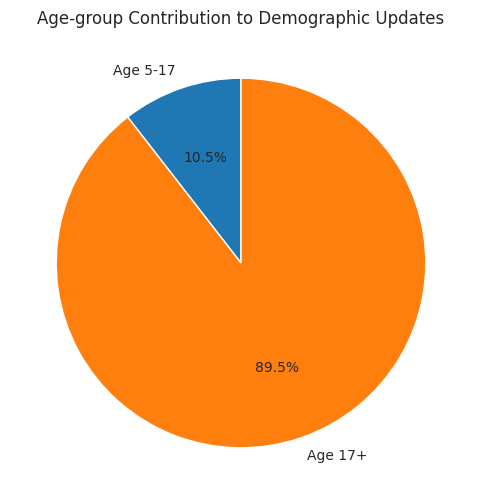

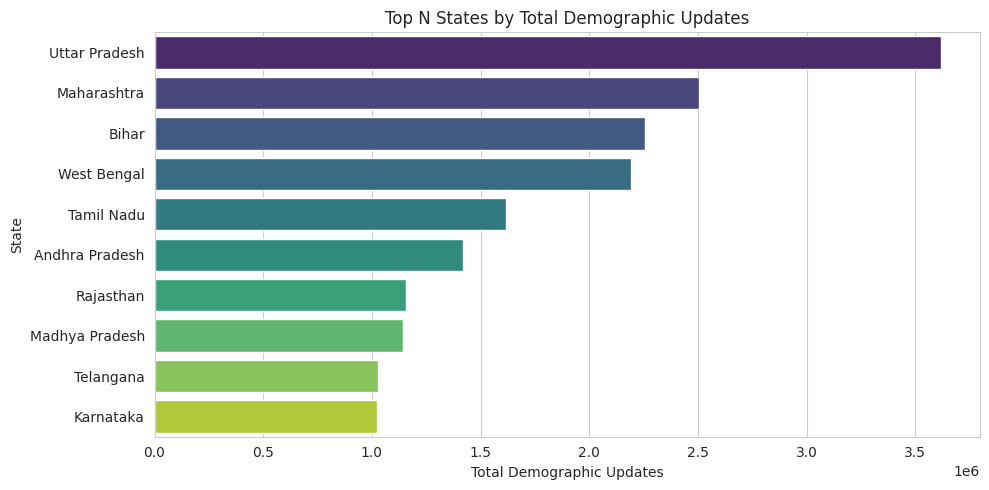

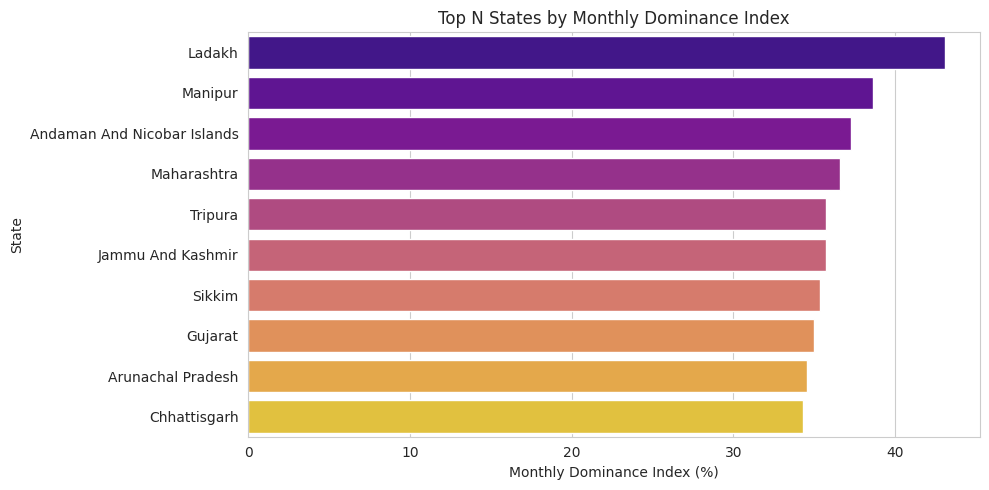

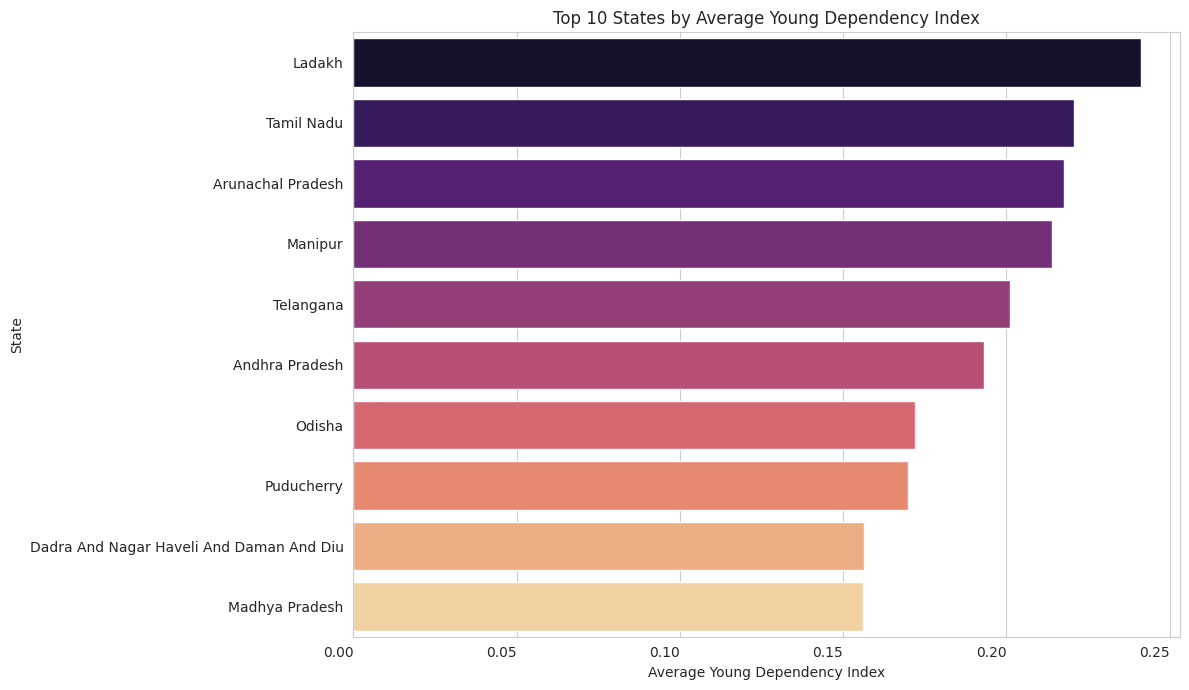

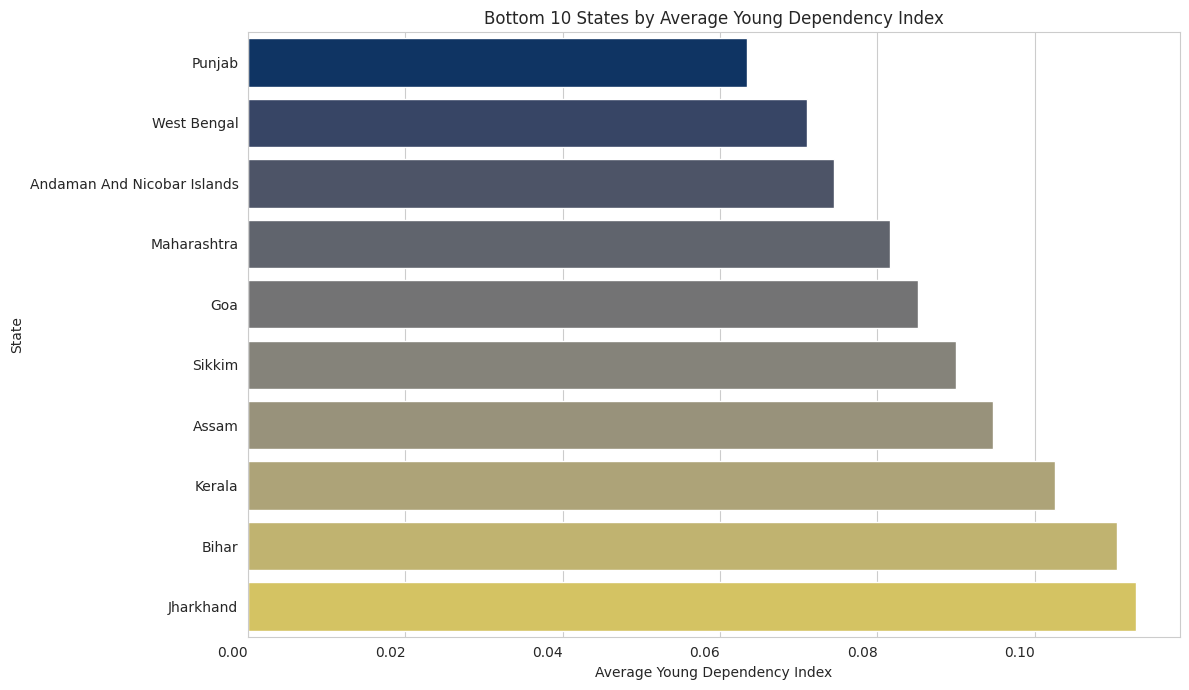

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# 1. Pie chart for overall age-group contributions
age_totals = df_demographics[['demo_age_5_17', 'demo_age_17_']].sum()

plt.figure(figsize=(6,6))
plt.pie(
    age_totals,
    labels=['Age 5-17', 'Age 17+'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Age-group Contribution to Demographic Updates')
plt.show()

# 2. Bar plot for top N states by total demographic updates
plt.figure(figsize=(10,5))
sns.barplot(
    data=state_updates,
    x='total_demographics',
    y='state',
    hue='state', # Add hue for distinct colors
    palette='viridis',
    legend=False
)
plt.title('Top N States by Total Demographic Updates')
plt.xlabel('Total Demographic Updates')
plt.ylabel('State')
plt.tight_layout()
plt.show()

# 3. Bar plot for top N states by Monthly Dominance Index
plt.figure(figsize=(10,5))
sns.barplot(
    data=top_mdi_states,
    x='monthly_dominance_index',
    y='state',
    hue='state', # Add hue for distinct colors
    palette='plasma',
    legend=False
)
plt.title('Top N States by Monthly Dominance Index')
plt.xlabel('Monthly Dominance Index (%)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

# 4. Bar plot for top N states by average Young Dependency Index
plt.figure(figsize=(12, 7))
sns.barplot(x='young_dependency_index', y='state', data=top_n_dependency_index, hue='state', palette='magma', legend=False)
plt.title(f'Top {N} States by Average Young Dependency Index')
plt.xlabel('Average Young Dependency Index')
plt.ylabel('State')
plt.xticks(rotation=0, ha='right') # Adjust rotation for better readability
plt.tight_layout()
plt.show()

# 5. Bar plot for bottom N states by average Young Dependency Index
plt.figure(figsize=(12, 7))
sns.barplot(x='young_dependency_index', y='state', data=bottom_n_dependency_index, hue='state', palette='cividis', legend=False)
plt.title(f'Bottom {N} States by Average Young Dependency Index')
plt.xlabel('Average Young Dependency Index')
plt.ylabel('State')
plt.xticks(rotation=0, ha='right') # Adjust rotation for better readability
plt.tight_layout()
plt.show()

### Summary of KPIs and Their Significance

-   **Overall Demographic Activity**: Total demographic updates amounted to 24,359,886, with an overall MDI of 30.81% (peak in Month 11), indicating significant monthly concentration.
-   **Regional Dominance**: Uttar Pradesh, Maharashtra, and Bihar were top states by total updates, highlighting major activity hubs.
-   **Concentrated Monthly Activity**: Ladakh (43.11%), Manipur (38.63%), and Andaman And Nicobar Islands (37.30%) showed highest MDIs, suggesting highly concentrated activities in specific months.
-   **Age-Group Contribution**: The 17+ age group accounted for 89.42% of updates, while the 5-17 age group contributed 10.50%, indicating a lean towards adult demographic changes.
-   **Young Dependency Index**: Ladakh (0.2411) had the highest average index, implying a greater proportion of young dependents, while Punjab (0.0634) had the lowest.

**Significance**: These KPIs are crucial for understanding demographic dynamics, informing policy decisions, and allocating resources effectively. For example, high MDI states warrant investigation into seasonal factors, and age-group disparities can guide resource allocation for specific age cohorts.

Overall Age-Group Contributions:

Total Demographic Updates for Age 5-17: 2,557,833.00 (10.50% of overall total).
Total Demographic Updates for Age 17+: 21,783,805.50 (89.42% of overall total).
Overall Total Demographic Updates: 24,359,886.00.
This clearly shows that the 17+ age group contributes the vast majority of demographic updates.

Top 10 States by Total Demographic Updates:

Uttar Pradesh: 3,617,238.0
Maharashtra: 2,505,665.0
Bihar: 2,257,318.0
West Bengal: 2,190,118.0
Tamil Nadu: 1,616,816.0
Andhra Pradesh: 1,418,213.0
Rajasthan: 1,157,456.0
Madhya Pradesh: 1,145,371.0
Telangana: 1,029,158.0
Karnataka: 1,021,672.0
These states represent the regions with the highest volume of demographic updates in the dataset.

